# Mounting to drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!pip install pypalettes

In [3]:
%cd /content/drive/MyDrive/capra_lab/HuSC/

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


/content/drive/MyDrive/capra_lab/HuSC


In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pypalettes as pp

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


# Setting global params

In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def apply_global_font(ax, size=26):
    """Apply Arial font and consistent size to axes labels and ticks."""
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(arial_font)
        label.set_fontsize(size)
    for axis_label in [ax.xaxis.label, ax.yaxis.label]:
        axis_label.set_fontproperties(arial_font)
        axis_label.set_fontsize(size)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [6]:
# --- Global Plot Settings ---
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Load font
arial_font = fm.FontProperties(fname="arial.ttf")

# --- Global rcParams ---
plt.rcParams.update({
    # Font and text
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'font.size': 20,
    'axes.titlesize': 24,
    'axes.labelsize': 26,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'axes.linewidth': 2.5,

    # Remove gridlines globally
    'axes.grid': False,
    'grid.linestyle': '',

    # Axes and ticks (ensures they are visible)
    'axes.edgecolor': 'black',
    'xtick.bottom': True,
    'ytick.left': True,
    'xtick.top': False,
    'ytick.right': False,
    'xtick.color': 'black',
    'ytick.color': 'black',
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.major.width': 2.5,
    'ytick.major.width': 2.5,
    'xtick.major.size': 20,
    'ytick.major.size': 20,

    # Figure defaults
    'figure.figsize': (8, 8),
    'savefig.format': 'svg',
    'savefig.bbox': 'tight',
    'savefig.dpi': 300,

    # Lines
    'lines.linewidth': 2,

    # Legend
    'legend.fontsize': 20,
    'legend.frameon': False
})

# ✅ Use a clean Seaborn base theme (no gridlines)
sns.set_theme(style="white", rc=plt.rcParams)


# Figures

Total number of residues:8804979


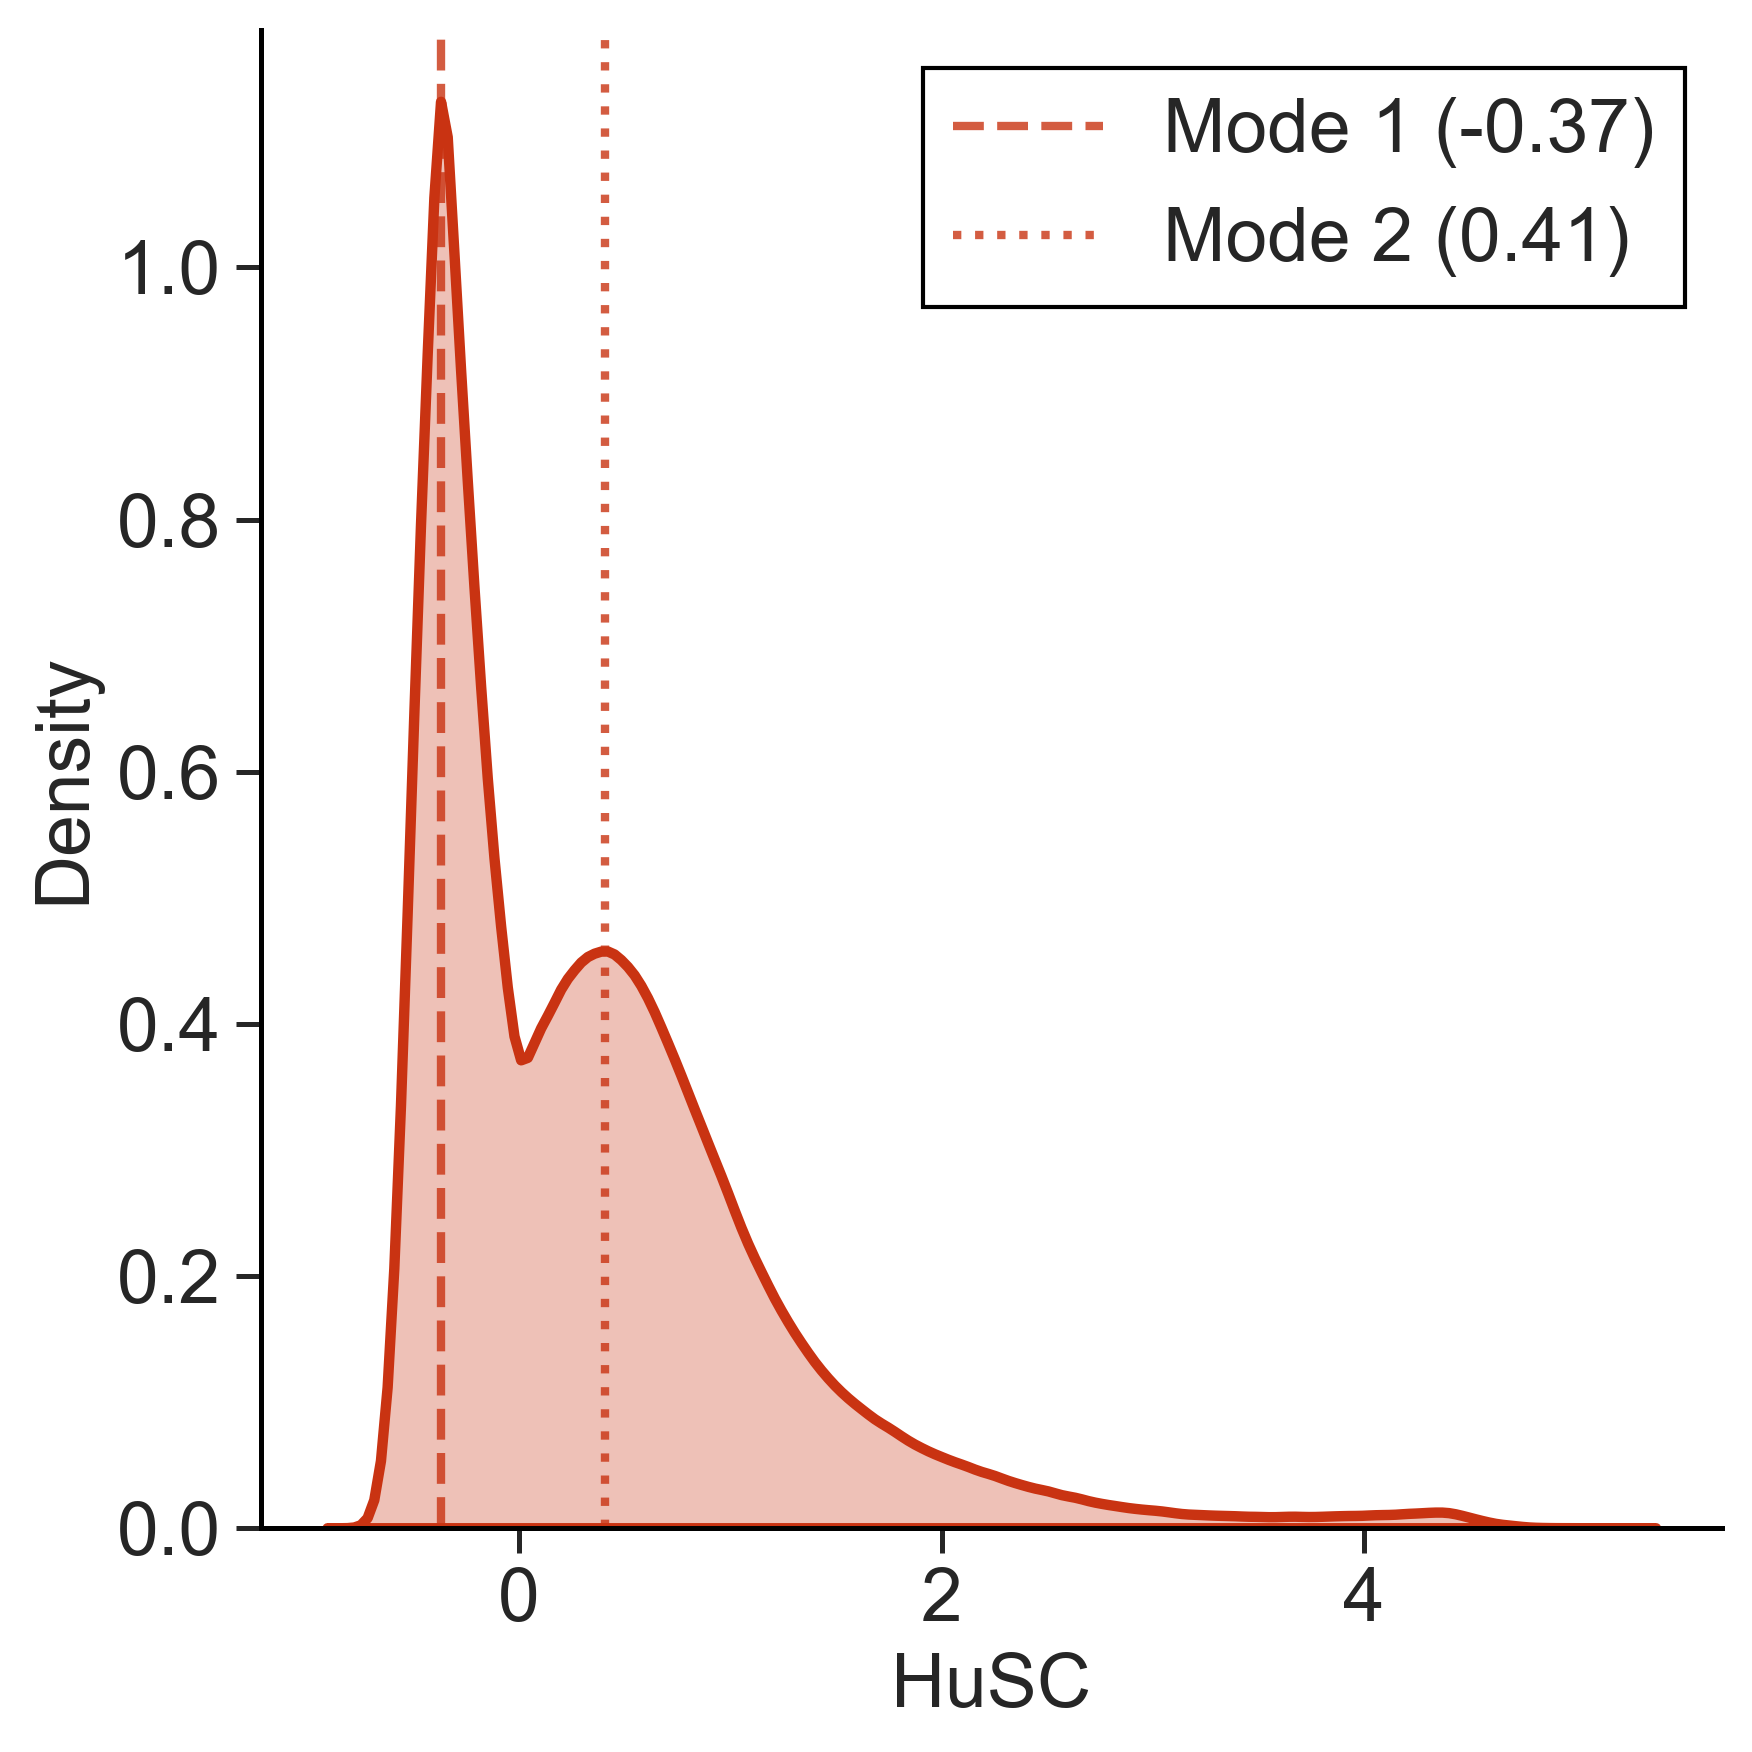

In [ ]:
#@title Fig 2A

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pypalettes import load_cmap
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde

# --- Configuration  ---
FIGURE_SIZE = (6, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
FONT_SIZE_LEGEND = 18
FONT_SIZE_TEXT = 15
SPINE_WIDTH = 1.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# Load color palette
colors = load_cmap('Royal1').colors

# --- Load data ---
df = pd.read_csv('all_husc_values.txt', header=None, names=['HuSC'])
print(f"Total number of residues:{len(df)}")

df['HuSC'] = pd.to_numeric(df['HuSC'], errors='coerce')

# --- Create figure  ---
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

# KDE plot
sns.kdeplot(df['HuSC'], color=colors[1], fill=True, alpha=0.3,
            linewidth=2.5, ax=ax)

# Find the two highest modes
kde = gaussian_kde(df['HuSC'].dropna())
x_range = np.linspace(df['HuSC'].min(), df['HuSC'].max(), 1000)
density = kde(x_range)

# Find peaks in the density
peaks, properties = find_peaks(density, prominence=0.01)

# Sort peaks by density height and get the two highest
if len(peaks) >= 2:
    peak_heights = density[peaks]
    top_two_indices = np.argsort(peak_heights)[-2:]
    top_two_peaks = peaks[top_two_indices]
    mode_positions = x_range[top_two_peaks]

    # Sort by position for consistent labeling
    mode_positions = np.sort(mode_positions)

    # Plot vertical lines for the two modes
    ax.axvline(mode_positions[0], color=colors[1], linestyle='--',
               linewidth=2, alpha=0.8, label=f'Mode 1 ({mode_positions[0]:.2f})')
    ax.axvline(mode_positions[1], color=colors[1], linestyle=':',
               linewidth=2, alpha=0.8, label=f'Mode 2 ({mode_positions[1]:.2f})')
elif len(peaks) == 1:
    # Only one peak found
    mode_position = x_range[peaks[0]]
    ax.axvline(mode_position, color=colors[1], linestyle='--',
               linewidth=2, alpha=0.8, label=f'Mode ({mode_position:.2f})')
else:
    # No distinct peaks, fall back to median
    median_val = df['HuSC'].median()
    ax.axvline(median_val, color=colors[1], linestyle='--',
               linewidth=2, alpha=0.8, label=f'Median ({median_val:.2f})')


# Labels and formatting (matching Fig 6B)
ax.set_xlabel("HuSC", fontsize=FONT_SIZE_LABELS,
              fontweight='bold', fontproperties=arial_font)
ax.set_ylabel("Density", fontsize=FONT_SIZE_LABELS,
              fontweight='bold', fontproperties=arial_font)

# Tick formatting
ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS, width=SPINE_WIDTH, bottom=True, left=True)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

# Create Arial font with the desired size
arial_font_legend = fm.FontProperties(fname="arial.ttf", size=FONT_SIZE_LEGEND)

# Legend
legend = ax.legend(fontsize=FONT_SIZE_LEGEND, frameon=True, fancybox=False,
                   edgecolor='black', framealpha=1, loc='best',
                   prop=arial_font_legend)  # Use the sized font

# Spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
    ax.spines[spine].set_color('black')

plt.tight_layout()

# Save the figure
plt.savefig('HSCZ_transformed_density.svg', dpi=DPI, bbox_inches='tight')
# plt.savefig('HSCZ_transformed_density.png', dpi=DPI, bbox_inches='tight')

plt.show()

SUMMARY STATISTICS BY CLASS

Olfactory:
  Count:   60630
  Mean:    1.1415
  Median:  0.8540
  Std:     1.1562
  Min:     -0.5650
  Max:     4.8730
  Q1:      0.3540
  Q3:      1.6400

Non essential:
  Count:   299557
  Mean:    0.6257
  Median:  0.4510
  Std:     0.9756
  Min:     -0.7590
  Max:     5.0850
  Q1:      -0.1430
  Q3:      1.0290

Recessive:
  Count:   596146
  Mean:    0.4716
  Median:  0.3340
  Std:     0.8419
  Min:     -0.8050
  Max:     4.8460
  Q1:      -0.2060
  Q3:      0.8680

Dominant:
  Count:   396503
  Mean:    0.2703
  Median:  0.0560
  Std:     0.7860
  Min:     -0.7510
  Max:     4.7840
  Q1:      -0.3370
  Q3:      0.6650

Essential:
  Count:   316284
  Mean:    0.1820
  Median:  -0.1000
  Std:     0.7620
  Min:     -0.7640
  Max:     4.7520
  Q1:      -0.3820
  Q3:      0.5630

Haploinsufficient:
  Count:   185307
  Mean:    0.0749
  Median:  -0.1930
  Std:     0.6621
  Min:     -0.7510
  Max:     4.7760
  Q1:      -0.3920
  Q3:      0.4050

OVERALL STAT

/tmp/ipython-input-2475340330.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


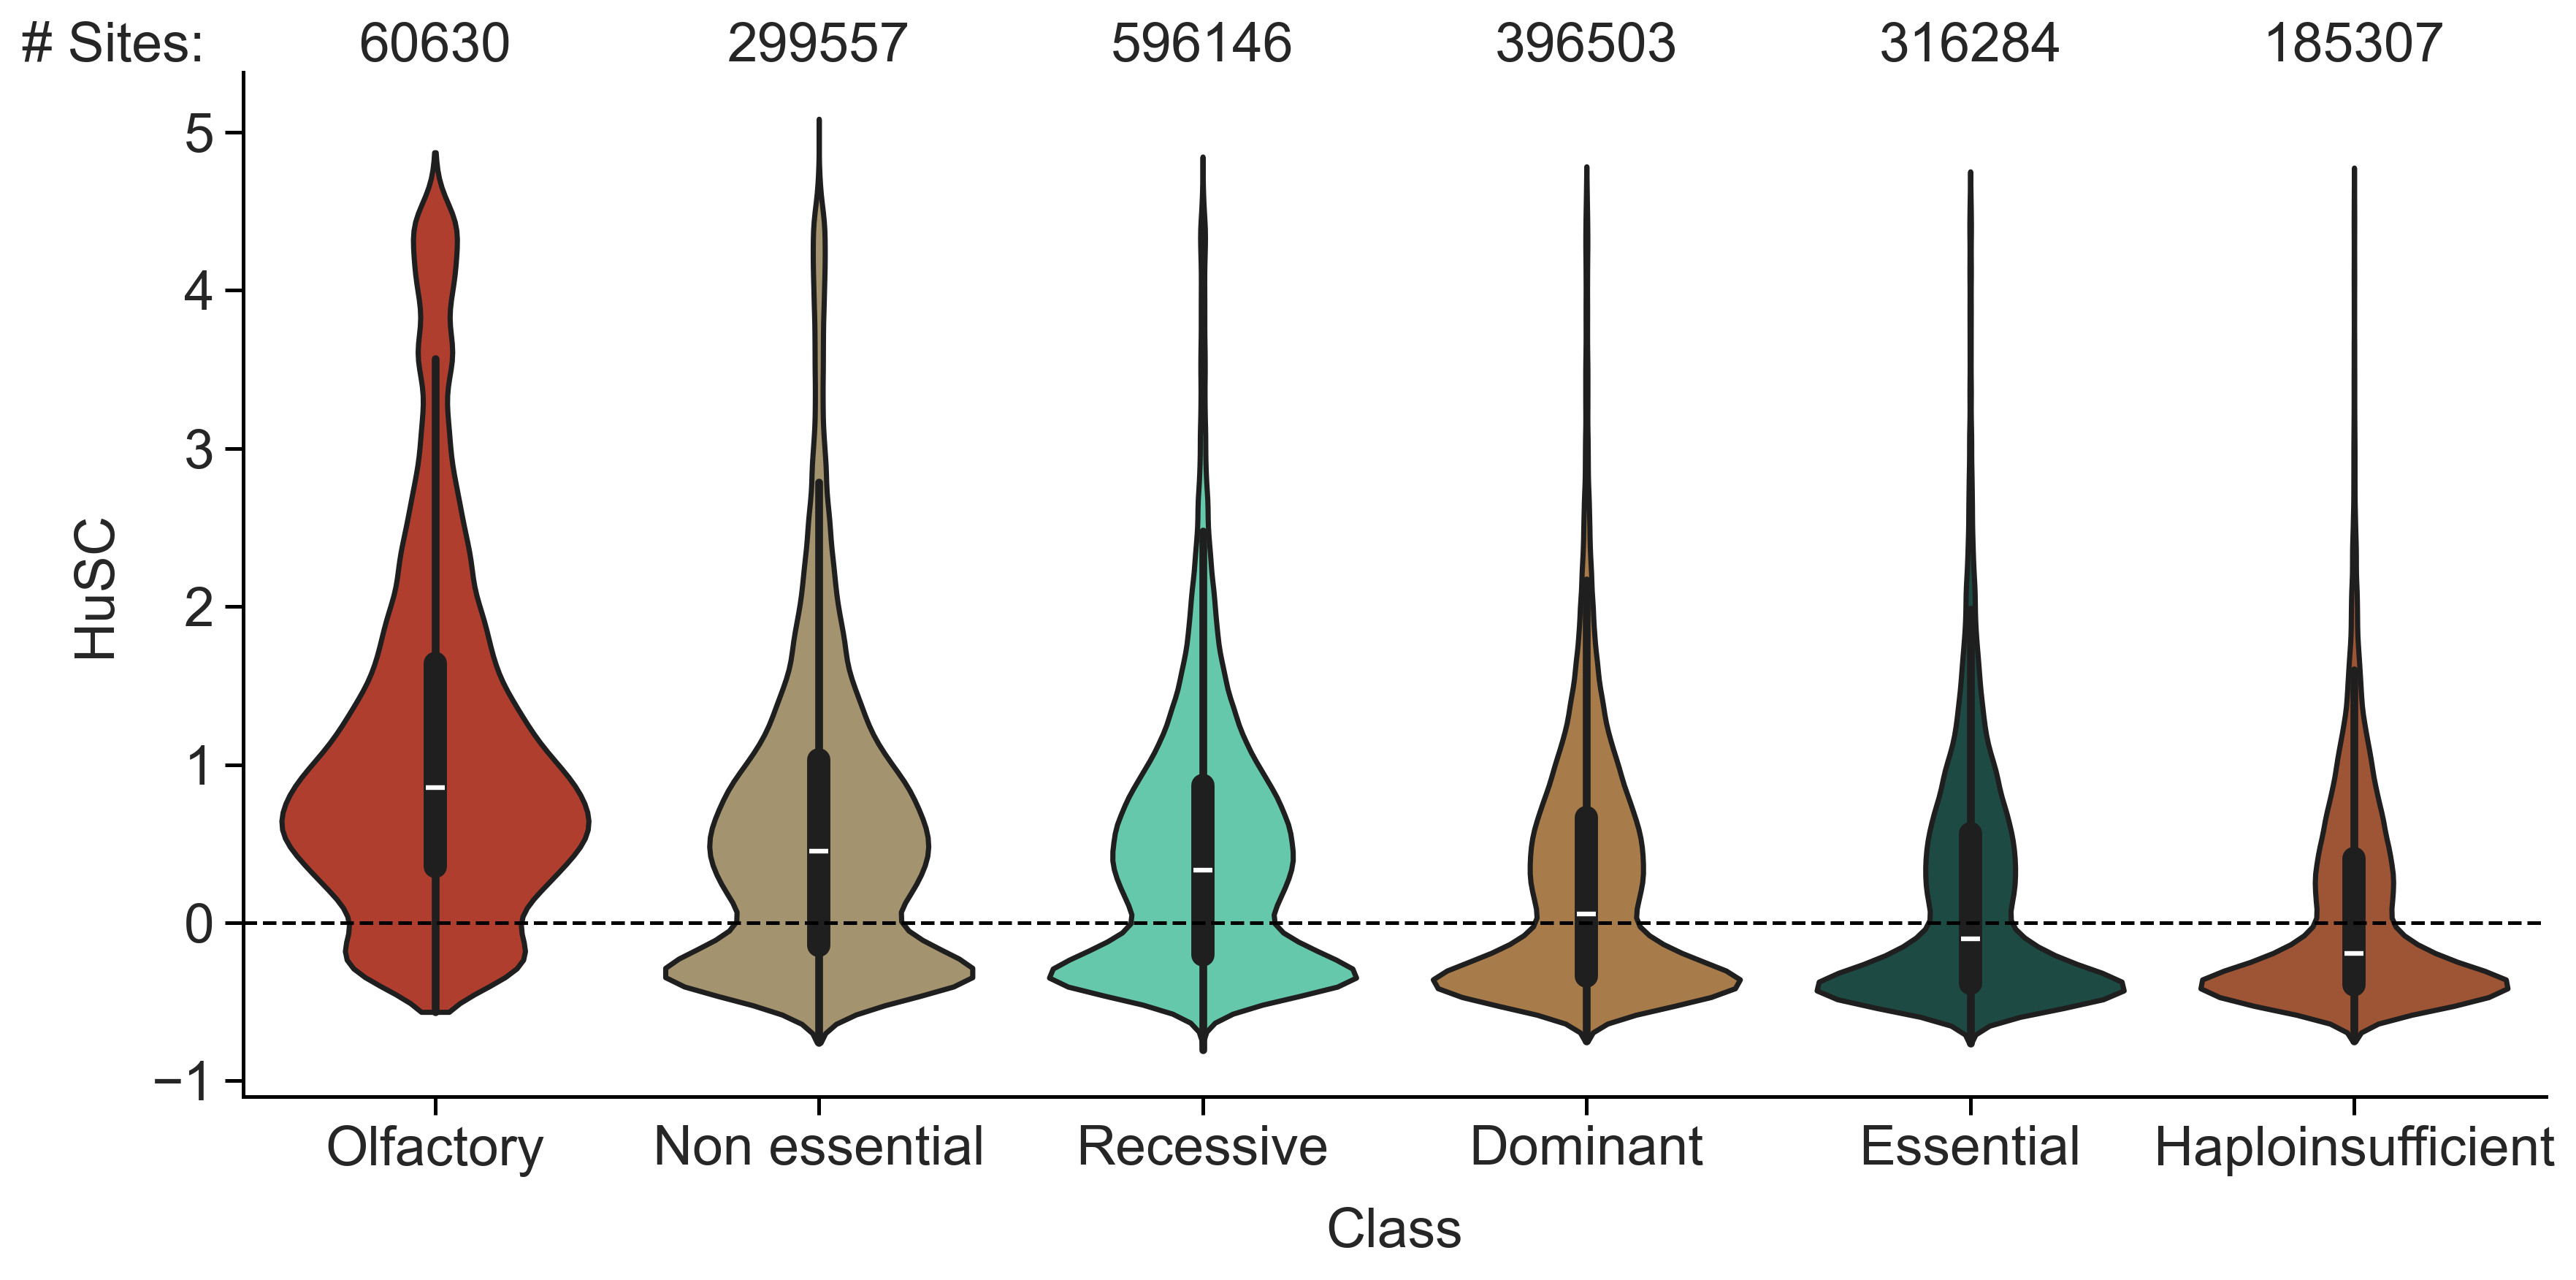

In [ ]:
#@title Fig 2C

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pypalettes import load_cmap
import matplotlib.font_manager as fm

# ===== Configuration =====
FIGURE_SIZE = (12, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
FONT_SIZE_TEXT = 18
SPINE_WIDTH = 1.2

# ===== Load Arial font =====
arial_font = fm.FontProperties(fname="arial.ttf")

# ===== Load Data =====
df = pd.read_csv('gene_set_scores_HuSC_8.tsv', sep='\t', usecols=['class', 'HuSC', 'uniprot_id'])

# ===== Print Summary Statistics =====
print("=" * 80)
print("SUMMARY STATISTICS BY CLASS")
print("=" * 80)

class_order = ['Olfactory', 'Non essential', 'Recessive', 'Dominant', 'Essential', 'Haploinsufficient']

for cls in class_order:
    class_data = df[df['class'] == cls]['HuSC']
    if len(class_data) > 0:
        print(f"\n{cls}:")
        print(f"  Count:   {len(class_data)}")
        print(f"  Mean:    {class_data.mean():.4f}")
        print(f"  Median:  {class_data.median():.4f}")
        print(f"  Std:     {class_data.std():.4f}")
        print(f"  Min:     {class_data.min():.4f}")
        print(f"  Max:     {class_data.max():.4f}")
        print(f"  Q1:      {class_data.quantile(0.25):.4f}")
        print(f"  Q3:      {class_data.quantile(0.75):.4f}")

print("\n" + "=" * 80)
print("OVERALL STATISTICS")
print("=" * 80)
print(df.groupby('class')['HuSC'].describe())
print("=" * 80 + "\n")

# ===== Define color palette =====
palette = load_cmap("AsteroidCity2").colors[:len(class_order)]

# ===== Create Figure =====
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

# ===== Plot =====
sns.violinplot(
    x='class', y='HuSC', data=df,
    order=class_order, palette=palette,
    cut=0, inner="box", linewidth=SPINE_WIDTH+0.5, ax=ax
)

# ===== Axis Labels =====
ax.set_xlabel('Class', fontsize=FONT_SIZE_LABELS,
              fontweight='bold', fontproperties=arial_font, labelpad=10)
ax.set_ylabel('HuSC', fontsize=FONT_SIZE_LABELS,
              fontweight='bold', fontproperties=arial_font, labelpad=10)

# ===== Annotation =====
# Count number of rows (sites) per class
site_counts = df['class'].value_counts().reindex(class_order)

ymax = df['HuSC'].max()
yoffset = 0.05 * (df['HuSC'].max() - df['HuSC'].min())

ax.text(-0.6, ymax + yoffset, "# Sites:",
        ha='right', va='bottom', fontsize=FONT_SIZE_TEXT,
        fontweight='bold', fontproperties=arial_font)

for i, cls in enumerate(class_order):
    if not pd.isna(site_counts[cls]):
        ax.text(i, ymax + yoffset, f"{int(site_counts[cls])}",
                ha='center', va='bottom', fontsize=FONT_SIZE_TEXT,
                fontweight='bold', fontproperties=arial_font)

# ===== Aesthetics =====
# Horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=SPINE_WIDTH)

# Tick parameters
ax.tick_params(axis='both', which='major', width=SPINE_WIDTH, color='black',
               bottom=True, left=True)

# ===== Tick label formatting =====
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

# ===== Spines =====
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
    ax.spines[spine].set_color('black')

# ===== Save and Show =====
plt.tight_layout()
plt.savefig('violin_plot_HuSC_sites.svg', dpi=DPI, bbox_inches='tight')
plt.show()

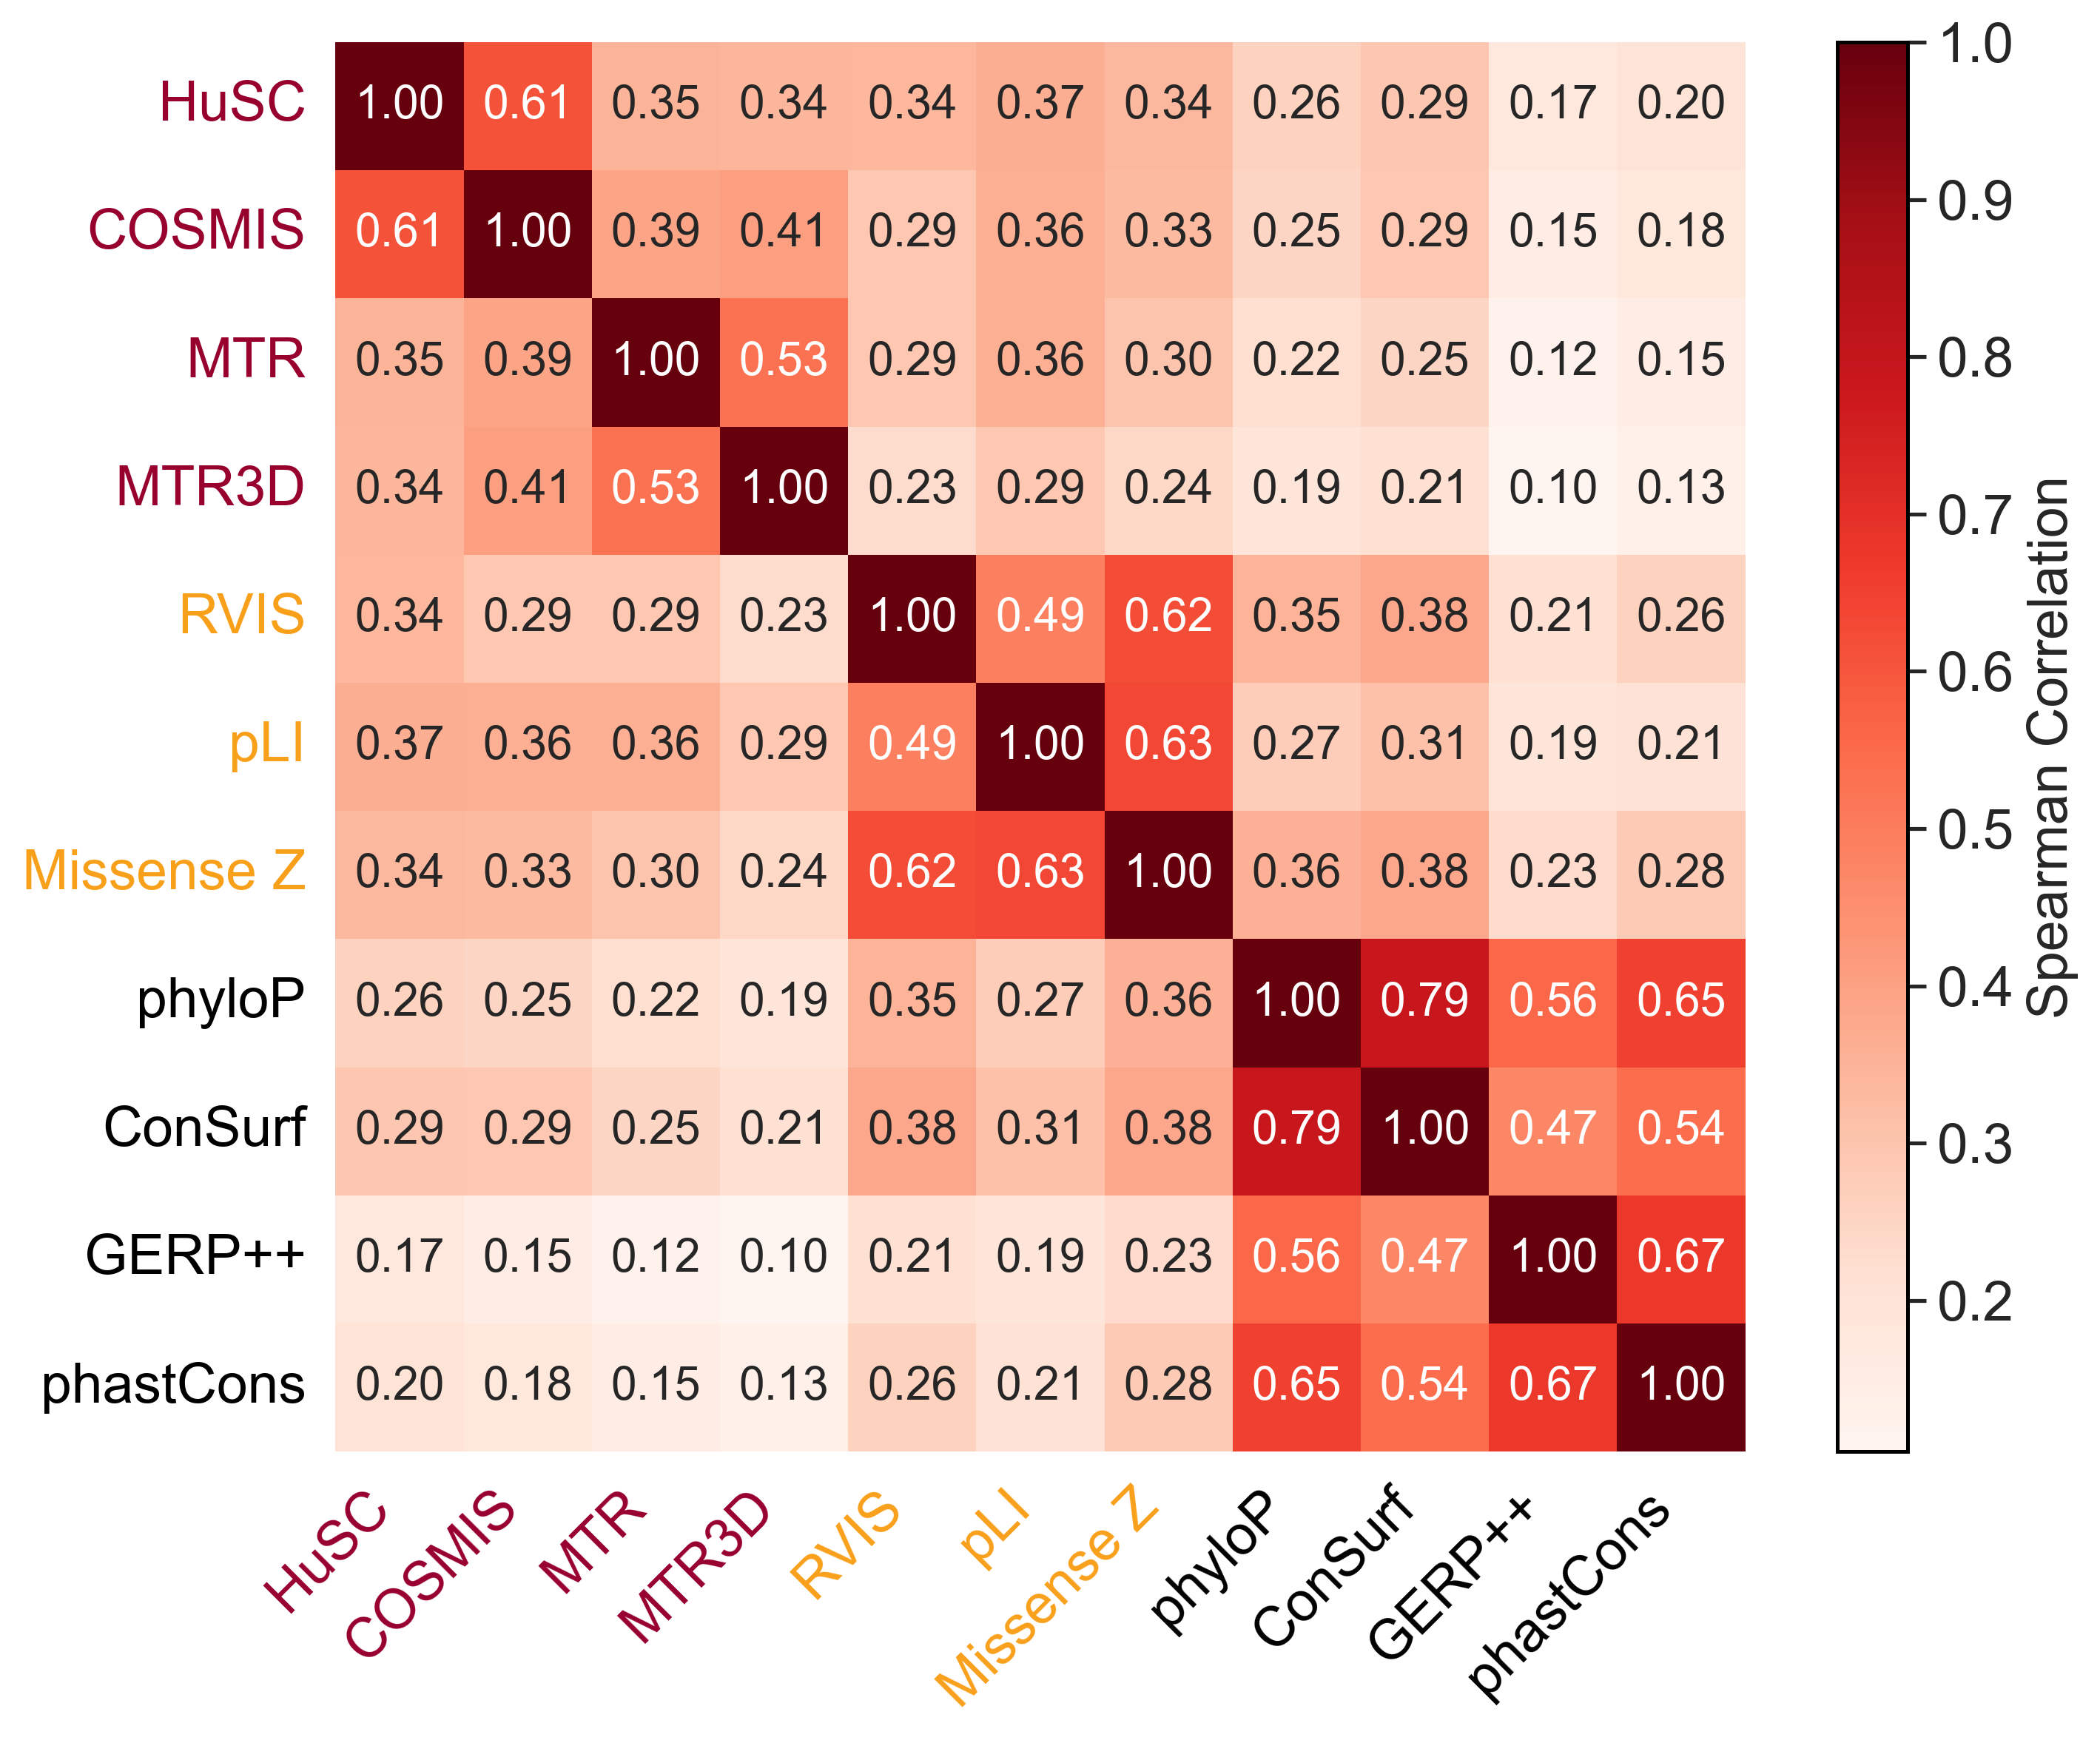

In [ ]:
#@title Fig 3A

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pypalettes import load_cmap
import matplotlib.font_manager as fm

# --- Configuration (matching publication style) ---
FIGURE_SIZE = (10, 8)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
FONT_SIZE_ANNOT = 15
FONT_SIZE_CBAR_LABEL = 18
FONT_SIZE_CBAR_TICKS = 18
SPINE_WIDTH = 1.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# Load palette
colors = load_cmap('heat').colors

# Load data
all_scores = pd.read_csv('all_conservation_scores_with_HuSC.csv', header=0)

# Scores to include
scores = ['HuSC', 'cosmis', 'mtr3d', 'mtr', 'gerp', 'phylop', 'phastcons', 'consurf', 'rvis', 'pli', 'mis_z']

# Spearman correlation (absolute values)
corr = all_scores[scores].corr(method='spearman').abs()

# Custom reorder
order = ['HuSC', 'cosmis', 'mtr', 'mtr3d', 'rvis', 'pli', 'mis_z',
         'phylop', 'consurf', 'gerp', 'phastcons']
corr_reordered = corr.reindex(index=order, columns=order)

# Pretty labels
labels_ordered = ['HuSC', 'COSMIS', 'MTR', 'MTR3D', 'RVIS', 'pLI', 'Missense Z',
                  'phyloP', 'ConSurf', 'GERP++', 'phastCons']

# Define label colors
label_colors = []
for i, label in enumerate(labels_ordered):
    if label in ['HuSC', 'COSMIS', 'MTR', 'MTR3D']:
        label_colors.append(colors[0])
    elif label in ['RVIS', 'pLI', 'Missense Z']:
        label_colors.append(colors[1])
    else:
        label_colors.append(colors[2])

# Create figure
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

# Plot heatmap
sns.heatmap(
    corr_reordered,
    annot=True,
    fmt=".2f",
    cmap='Reds',
    cbar_kws={'label': 'Spearman Correlation'},
    square=True,
    xticklabels=labels_ordered,
    yticklabels=labels_ordered,
    annot_kws={"fontsize": FONT_SIZE_ANNOT, "fontproperties": arial_font},
    linewidths=0,
    linecolor='white',
    ax=ax
)

# Format colorbar
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_fontproperties(arial_font)
cbar.ax.yaxis.label.set_size(FONT_SIZE_CBAR_LABEL)
cbar.ax.yaxis.label.set_weight('bold')
cbar.outline.set_linewidth(SPINE_WIDTH)
cbar.outline.set_edgecolor('black')

for tick in cbar.ax.get_yticklabels():
    tick.set_fontproperties(arial_font)
    tick.set_fontsize(FONT_SIZE_CBAR_TICKS)

# Rotate and format tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Apply font and colors to tick labels
for xtick, color in zip(ax.get_xticklabels(), label_colors):
    xtick.set_fontproperties(arial_font)
    xtick.set_fontsize(FONT_SIZE_TICKS)
    xtick.set_color(color)
    xtick.set_weight('bold')

for ytick, color in zip(ax.get_yticklabels(), label_colors):
    ytick.set_fontproperties(arial_font)
    ytick.set_fontsize(FONT_SIZE_TICKS)
    ytick.set_color(color)
    ytick.set_weight('bold')

# Format heatmap spines
for spine in ax.spines.values():
    spine.set_linewidth(SPINE_WIDTH)
    spine.set_edgecolor('black')

plt.tight_layout()

# Save the figure
plt.savefig('heatmap.svg', dpi=DPI, bbox_inches='tight', format='svg')
# plt.savefig('heatmap.png', dpi=DPI, bbox_inches='tight')

plt.show()

In [ ]:
#@title Fig 3B

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from pypalettes import load_cmap
from matplotlib import font_manager as fm

# --- Configuration ---
FIGURE_SIZE = (6, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
SPINE_WIDTH = 1.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# Load color palette
colors = load_cmap('Royal1').colors

# --- Load data ---
df = pd.read_csv('context_clinvar_with_HuSC.csv', header=0)

# Column mapping for plotting
column_labels = {
    'HuSC': 'HuSC',
    'consurf': 'ConSurf',
    'phylop': 'PhyloP',
    'cosmis': 'COSMIS',
    'gerp': 'GERP',
    'phastcons': 'PhastCons',
    'mtr3d': 'MTR3D'
}

columns_to_plot = list(column_labels.keys())
label_column = 'label'

# Drop missing data
df = df.dropna(subset=columns_to_plot + [label_column]).copy()

print("Pathogenic variants:", len(df[df['label'] == 1]))
print("Benign variants:", len(df[df['label'] == 0]))

# --- Invert scores as needed ---
for col in ['HuSC', 'consurf', 'cosmis', 'mtr3d']:
    df[col] = -df[col]

# --- Helper function ---
def bootstrap_auc(y_true, y_pred, auc_function, n_bootstraps=1000):
    rng = np.random.default_rng(42)
    scores = []
    for _ in range(n_bootstraps):
        idx = rng.integers(0, len(y_true), len(y_true))
        if len(np.unique(y_true[idx])) < 2:
            continue
        scores.append(auc_function(y_true[idx], y_pred[idx]))
    return np.mean(scores), np.std(scores)

# --- Compute ROC AUC ---
roc_results = {col: bootstrap_auc(df[label_column].values,
                                  df[col].values, roc_auc_score)
               for col in columns_to_plot}

# --- Print AUC values ---
print("\n=== ROC AUC Results ===")
for col in columns_to_plot:
    mean_auc, std_auc = roc_results[col]
    print(f"{column_labels[col]:12s}: {mean_auc:.4f} ± {std_auc:.4f}")

# --- Prepare results ---
roc_means = np.array([roc_results[col][0] for col in columns_to_plot])
roc_stds = np.array([roc_results[col][1] for col in columns_to_plot])

# Sort by AUC (descending)
roc_order = np.argsort(-roc_means)

print("\n=== Sorted by AUC (Descending) ===")
for i in roc_order:
    col = columns_to_plot[i]
    mean_auc, std_auc = roc_results[col]
    print(f"{column_labels[col]:12s}: {mean_auc:.4f} ± {std_auc:.4f}")

# --- Create figure ---
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

x = np.arange(len(columns_to_plot))

ax.bar(x, roc_means[roc_order], yerr=roc_stds[roc_order],
       capsize=4, width=0.6, color=colors[0])

# Labels and formatting
ax.set_xticks(x)
ax.set_xticklabels([column_labels[columns_to_plot[i]] for i in roc_order],
                   ha='center', rotation=45)
ax.set_ylabel("ROC AUC", fontsize=FONT_SIZE_LABELS,
              fontweight='bold', fontproperties=arial_font)
ax.set_ylim(0.5, 1)

# Tick formatting
ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS,
               width=SPINE_WIDTH, bottom=True, left=True)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

# Spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
    ax.spines[spine].set_color('black')

plt.tight_layout()

# Save the figure
plt.savefig("roc_auc_barplot.svg", dpi=DPI, bbox_inches='tight')
# plt.savefig("roc_auc_barplot.png", dpi=DPI, bbox_inches='tight')

plt.show()

Pathogenic variants: 6416
Benign variants: 7204

=== ROC AUC Results ===
HuSC        : 0.9130 ± 0.0026
ConSurf     : 0.8403 ± 0.0034
PhyloP      : 0.8055 ± 0.0038
COSMIS      : 0.7203 ± 0.0042
GERP        : 0.6851 ± 0.0048
PhastCons   : 0.6801 ± 0.0045
MTR3D       : 0.6575 ± 0.0045

=== Sorted by AUC (Descending) ===
HuSC        : 0.9130 ± 0.0026
ConSurf     : 0.8403 ± 0.0034
PhyloP      : 0.8055 ± 0.0038
COSMIS      : 0.7203 ± 0.0042
GERP        : 0.6851 ± 0.0048
PhastCons   : 0.6801 ± 0.0045
MTR3D       : 0.6575 ± 0.0045


Loading data...
Loaded 2,125,803 residues from 5,643 genes

Human-specific constrained: 7,131

Pearson r = 0.1848
Pearson p-value = 0.0

Spearman rho = 0.2893
Spearman p-value = 0.0

Downsampled to 100,000 residues for visualization


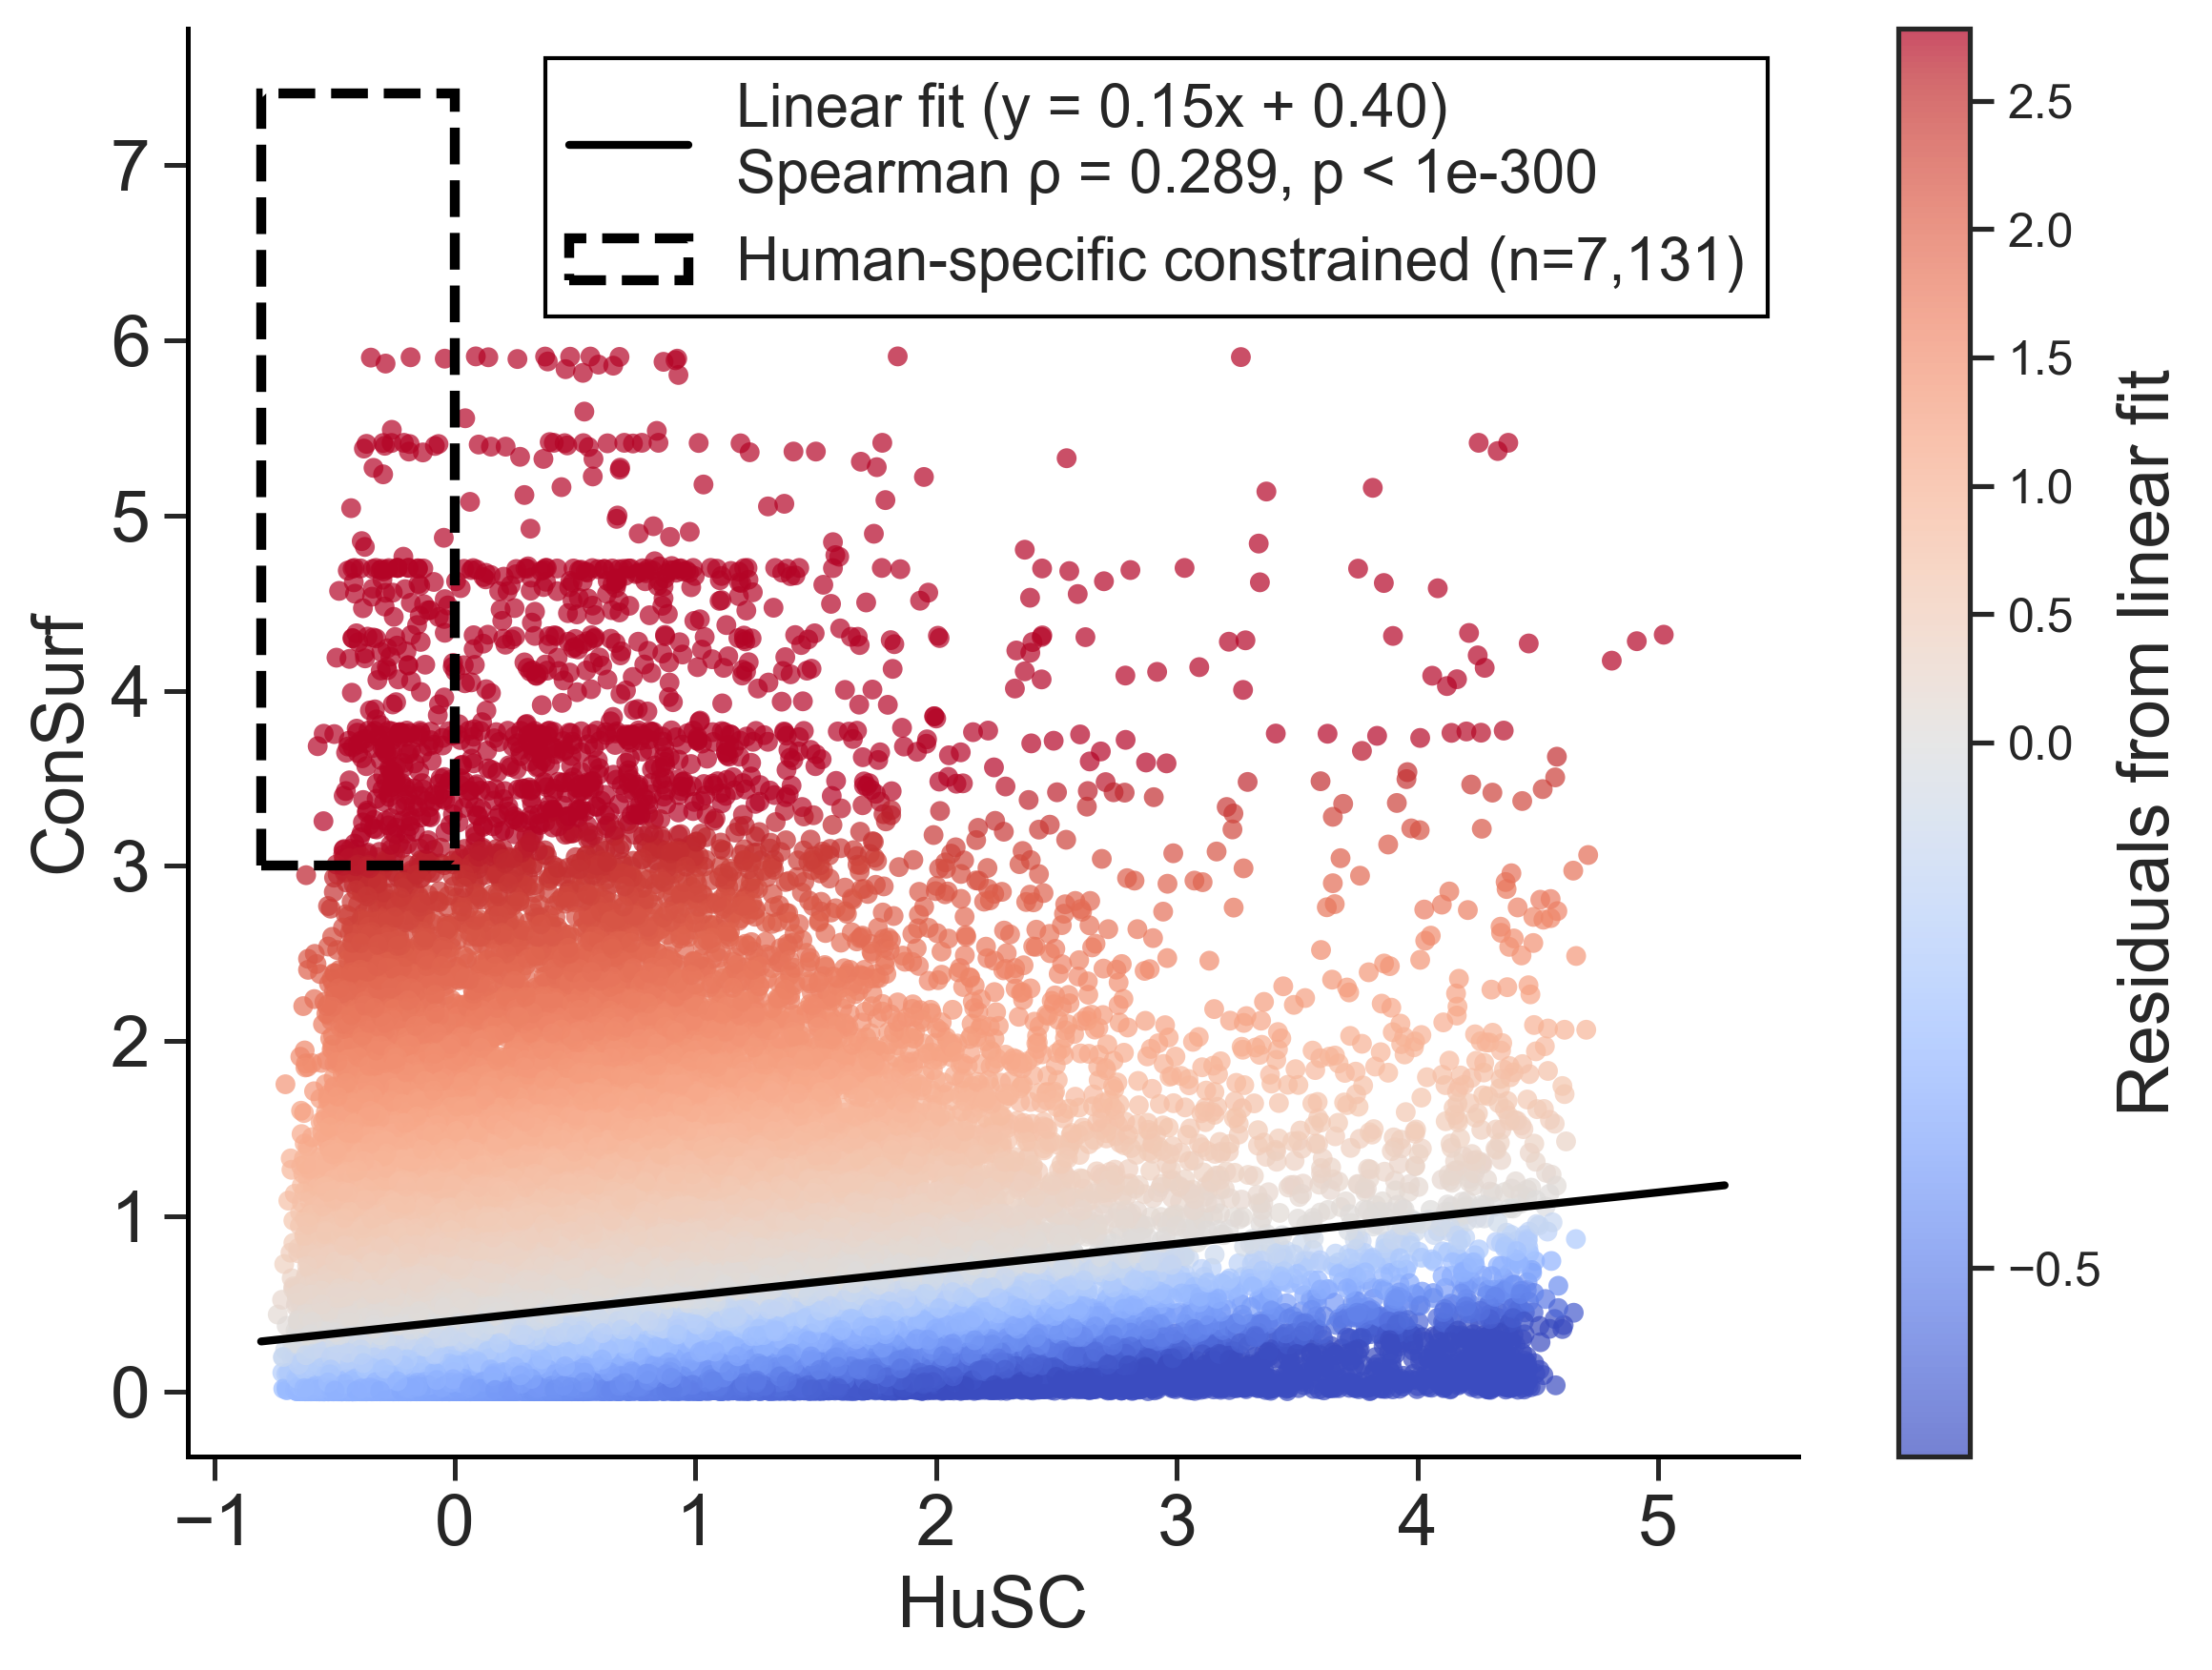


✓ Complete!


In [ ]:
#@title Fig 4A

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import TwoSlopeNorm
from scipy.stats import pearsonr, spearmanr
import matplotlib.font_manager as fm

# Configuration
FIGURE_SIZE = (8, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
FONT_SIZE_LEGEND = 15
FONT_SIZE_TEXT = 15
SCATTER_SIZE = 25
SCATTER_ALPHA = 0.7
SPINE_WIDTH = 1.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# Load and clean data
print("Loading data...")
df = pd.read_csv("all_conservation_scores_with_HuSC.csv")

df = df[["HuSC", "consurf", "gene_name"]].replace([np.inf, -np.inf], np.nan).dropna()
print(f"Loaded {len(df):,} residues from {df['gene_name'].nunique():,} genes")

# Define thresholds
HUSC_LOW_MAX = 0.0
CONS_HIGH_MIN = 3.0

# Identify human-specific constrained category (full dataset)
hsc = df[(df["HuSC"] < HUSC_LOW_MAX) & (df["consurf"] > CONS_HIGH_MIN)].copy()
print(f"\nHuman-specific constrained: {len(hsc):,}")

# Save gene lists
gene_sizes = df.groupby("gene_name").size().reset_index(name="n_residues_total")

hsc_genes = hsc.groupby("gene_name").size().reset_index(name="n_residues_in_category")
hsc_genes = hsc_genes.merge(gene_sizes, on="gene_name")
hsc_genes["proportion_in_category"] = hsc_genes["n_residues_in_category"] / hsc_genes["n_residues_total"]
hsc_genes.to_csv("human_specific_constrained_genes_all.csv", index=False)

pd.DataFrame({"gene_name": df["gene_name"].drop_duplicates().sort_values()}).to_csv("background_genes_all.csv", index=False)

# Calculate linear fit on full dataset
coeffs = np.polyfit(df["HuSC"], df["consurf"], 1)
m, b = coeffs
df["fitted"] = m * df["HuSC"] + b
df["residuals"] = df["consurf"] - df["fitted"]

# Calculate Pearson correlation on full dataset
r_pearson, pval_pearson = pearsonr(df["HuSC"], df["consurf"])
print(f"\nPearson r = {r_pearson:.4f}")
print(f"Pearson p-value = {pval_pearson}")

# Calculate Spearman correlation on full dataset
r_spearman, pval_spearman = spearmanr(df["HuSC"], df["consurf"])
print(f"\nSpearman rho = {r_spearman:.4f}")
print(f"Spearman p-value = {pval_spearman}")

# Format p-values for display
if pval_pearson < 1e-300:
    pval_pearson_str = "p < 1e-300"
elif pval_pearson < 0.001:
    pval_pearson_str = f"p < {pval_pearson:.2e}"
else:
    pval_pearson_str = f"p = {pval_pearson:.3f}"

if pval_spearman < 1e-300:
    pval_spearman_str = "p < 1e-300"
elif pval_spearman < 0.001:
    pval_spearman_str = f"p < {pval_spearman:.2e}"
else:
    pval_spearman_str = f"p = {pval_spearman:.3f}"

# Downsample for visualization
DOWNSAMPLE_SIZE = 100000
if len(df) > DOWNSAMPLE_SIZE:
    df_plot = df.sample(n=DOWNSAMPLE_SIZE, random_state=42)
    print(f"\nDownsampled to {len(df_plot):,} residues for visualization")
else:
    df_plot = df
    print(f"\nUsing all {len(df_plot):,} residues for visualization")

# Create plot
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

# Create normalization with 0 centered at white
vmin = df["residuals"].quantile(0.01)
vmax = df["residuals"].quantile(0.99)
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

# Plot downsampled residues colored by residuals (coolwarm gradient)
sc = ax.scatter(
    df_plot["HuSC"],
    df_plot["consurf"],
    c=df_plot["residuals"],
    cmap='coolwarm',
    s=SCATTER_SIZE,
    alpha=SCATTER_ALPHA,
    edgecolors="none",
    norm=norm,
    zorder=1
)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Residuals from linear fit', fontsize=FONT_SIZE_LABELS,
               fontweight='bold', fontproperties=arial_font)
cbar.ax.tick_params(labelsize=FONT_SIZE_TICKS)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(arial_font)

# Plot regression line with both correlations in legend
x_trend = np.array([df["HuSC"].min(), df["HuSC"].max()])
y_trend = m * x_trend + b
ax.plot(
    x_trend, y_trend,
    color='black',
    linewidth=2,
    label=f'Linear fit (y = {m:.2f}x + {b:.2f})\nSpearman ρ = {r_spearman:.3f}, {pval_spearman_str}',
    zorder=2
)

# Draw dashed box for human-specific constrained region
x_min, y_max = df["HuSC"].min(), df["consurf"].max()
rect_hsc = Rectangle(
    (x_min, CONS_HIGH_MIN),
    HUSC_LOW_MAX - x_min,
    y_max - CONS_HIGH_MIN,
    linewidth=2.5,
    edgecolor='black',
    facecolor="none",
    linestyle='--',
    label=f'Human-specific constrained (n={len(hsc):,})',
    zorder=3
)
ax.add_patch(rect_hsc)

# Styling
ax.set_xlabel("HuSC", fontsize=FONT_SIZE_LABELS,
              fontweight='bold', fontproperties=arial_font)
ax.set_ylabel("ConSurf", fontsize=FONT_SIZE_LABELS,
              fontweight='bold', fontproperties=arial_font)
ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS, width=SPINE_WIDTH, bottom=True, left=True)


for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
    ax.spines[spine].set_color('black')

arial_font_legend = fm.FontProperties(fname="arial.ttf", size=FONT_SIZE_LEGEND)

ax.legend(
    fontsize=FONT_SIZE_LEGEND,
    prop=arial_font_legend,
    frameon=True,
    fancybox=False,
    loc='upper right',
    edgecolor='black',
    framealpha=1
)


plt.tight_layout()
# plt.savefig("residue_conservation_scatter_publication.svg", dpi=DPI, bbox_inches='tight')
plt.savefig("residue_conservation_scatter_publication.png", dpi=DPI, bbox_inches='tight')
plt.show()

print("\n✓ Complete!")

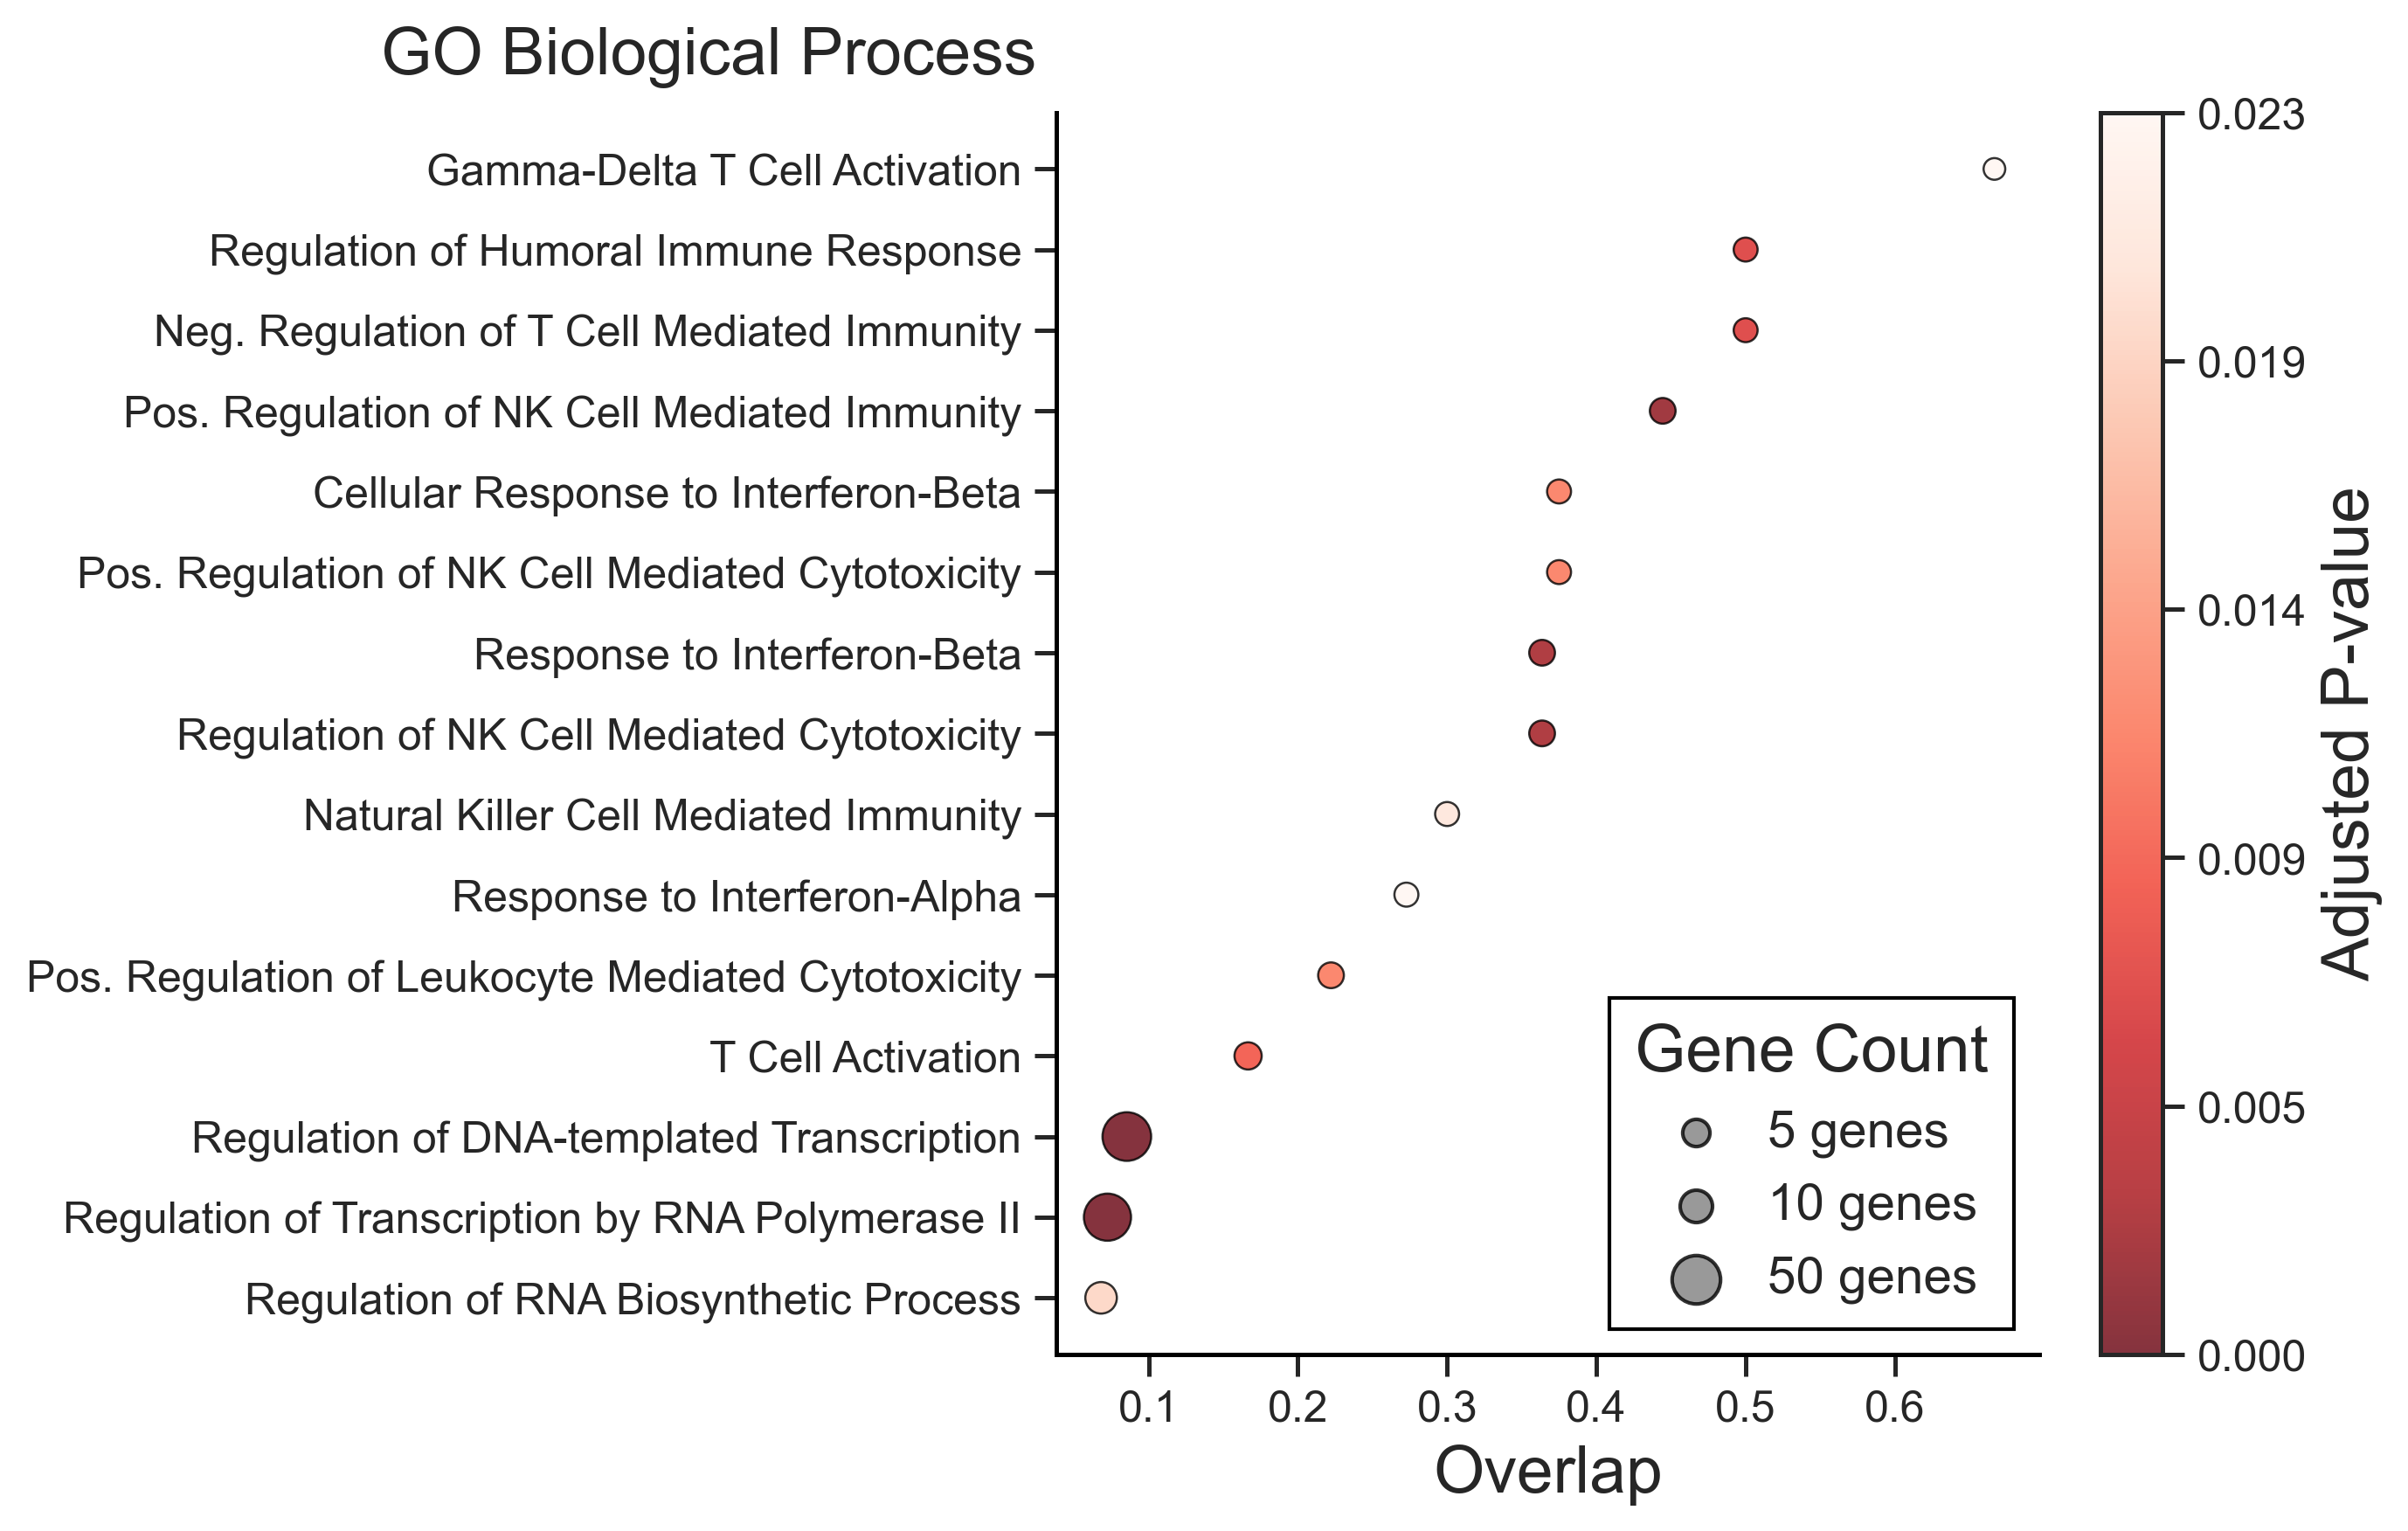

In [ ]:
#@title Fig 4B

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# =========================
# Configuration (matching your template)
# =========================
FIGURE_SIZE = (9, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 12
FONT_SIZE_LEGEND = 18
FONT_SIZE_TITLE = 15
SPINE_WIDTH = 1.2
SCATTER_ALPHA = 0.8
EDGE_WIDTH = 0.6

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# =========================
# Input
# =========================
CONSTRAINED_FILE = "GO_Biological_Process_2025_table_constrained.txt"

# =========================
# Load data
# =========================
df = pd.read_csv(CONSTRAINED_FILE, sep="\t")

# =========================
# Preprocessing
# =========================
# Parse overlap "56/597" → counts
df[["Overlap_Count", "Term_Size"]] = (
    df["Overlap"].astype(str).str.split("/", expand=True).astype(int)
)

# Compute overlap fraction
df["Overlap_Fraction"] = df["Overlap_Count"] / df["Term_Size"]

# Clean GO term names
df["Term"] = df["Term"].str.replace(r"\s*\(GO:\d+\)", "", regex=True)

# Ensure numeric adjusted p-values
df["Adjusted P-value"] = pd.to_numeric(df["Adjusted P-value"], errors="coerce")
df = df.dropna(subset=["Adjusted P-value"])

# =========================
# Filter top terms and order by overlap fraction
# =========================
TOP_N = 15
# pick top significant terms
df = df.sort_values("Adjusted P-value").head(TOP_N)
# order by overlap fraction (highest → lowest)
df = df.sort_values("Overlap_Fraction", ascending=False)

# =========================
# SIZE SCALING — √ for perceptual correctness
# =========================
size_scale = 25
sizes = np.sqrt(df["Overlap_Count"]) * size_scale

# =========================
# Plot
# =========================
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

scatter = ax.scatter(
    df["Overlap_Fraction"],
    df["Term"],
    s=sizes,
    c=df["Adjusted P-value"],
    cmap="Reds_r",  # _r reverses the colormap so lower p-values are darker red
    alpha=SCATTER_ALPHA,
    edgecolor="black",
    linewidth=EDGE_WIDTH
)

# =========================
# Colorbar for adjusted p-value
# =========================
# cbar = plt.colorbar(scatter, ax=ax)
# cbar.set_label("Adjusted P-value", fontsize=FONT_SIZE_LABELS,
#                fontweight='bold', fontproperties=arial_font)
# cbar.ax.tick_params(labelsize=FONT_SIZE_TICKS, width=SPINE_WIDTH)
# for label in cbar.ax.get_yticklabels():
#     label.set_fontproperties(arial_font)
# cbar.outline.set_linewidth(SPINE_WIDTH)

# =========================
# Colorbar for adjusted p-value
# =========================
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Adjusted P-value", fontsize=FONT_SIZE_LABELS,
               fontweight='bold', fontproperties=arial_font)

# Create equidistant ticks from min to max
vmin = df["Adjusted P-value"].min()
vmax = df["Adjusted P-value"].max()
n_ticks = 6  # adjust as needed for desired spacing
ticks = np.linspace(vmin, vmax, n_ticks)
cbar.set_ticks(ticks)

# Format to 3 decimal places
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.3f}'))

cbar.ax.tick_params(labelsize=FONT_SIZE_TICKS, width=SPINE_WIDTH)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(arial_font)
cbar.outline.set_linewidth(SPINE_WIDTH)
# =========================
# Dot-size legend
# =========================
legend_counts = [5, 10, 50]  # adjust for your data
legend_sizes = np.sqrt(legend_counts) * size_scale

handles = [
    ax.scatter([], [], s=s, edgecolor="black", facecolor="gray", alpha=SCATTER_ALPHA)
    for s in legend_sizes
]

arial_font_legend = fm.FontProperties(fname="arial.ttf", size=FONT_SIZE_LEGEND)


# legend = ax.legend(
#     handles,
#     [f"{c} genes" for c in legend_counts],
#     title="Gene Count",
#     loc="lower right",
#     frameon=True,
#     fancybox=False,
#     labelspacing=1.2,
#     borderpad=1.1,
#     fontsize=FONT_SIZE_LEGEND,
#     prop=arial_font_legend,
#     title_fontsize=FONT_SIZE_LEGEND,
#     edgecolor="black",
#     framealpha=1
# )

legend = ax.legend(
    handles,
    [f"{c} genes" for c in legend_counts],
    title="Gene Count",
    loc="lower right",
    frameon=True,
    fancybox=False,
    labelspacing=0.5,      # ← Reduced from 1.2 (vertical space between items)
    borderpad=0.5,         # ← Reduced from 1.1 (padding inside legend border)
    handletextpad=0.4,     # ← NEW: space between marker and text (default ~0.8)
    fontsize=14,           # ← Reduced from FONT_SIZE_LEGEND (18)
    prop=fm.FontProperties(fname="arial.ttf", size=14),  # ← Match fontsize
    title_fontsize=14,     # ← Reduced from FONT_SIZE_LEGEND (18)
    edgecolor="black",
    framealpha=1
)

legend.get_title().set_fontproperties(arial_font_legend)
legend.get_title().set_fontweight('bold')

# =========================
# Largest overlap at top
# =========================
ax.invert_yaxis()

# =========================
# Labels & formatting
# =========================
ax.set_xlabel("Overlap",
              fontsize=FONT_SIZE_LABELS, fontweight='bold',
              fontproperties=arial_font)
# Remove the ylabel or set it to empty
ax.set_ylabel("")

# Add horizontal label at top of y-axis
ax.text(-0.02, 1.02, "GO Biological Process",
        transform=ax.transAxes,
        fontsize=FONT_SIZE_LABELS,
        fontweight='bold',
        fontproperties=arial_font,
        ha='right',
        va='bottom')

# Tick formatting
ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS,
               width=SPINE_WIDTH, bottom=True, left=True)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

# =========================
# Spines (matching your template style)
# =========================
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
    ax.spines[spine].set_color('black')

plt.tight_layout()

# Optional: save the figure
plt.savefig('go_enrichment_constrained.svg', dpi=DPI, bbox_inches='tight')
plt.show()

In [ ]:
#@title Fig 4C

df = pd.read_csv("all_conservation_scores_with_HSCZ_8.csv")

filtered_df_SLAMF6 = df[df['gene_name'] == 'SLAMF6']


filtered_df_SLAMF6.to_csv('filtered_data_SLAMF6.csv', index=False)

filtered_df_ZNF460 = df[df['gene_name'] == 'ZNF460']


filtered_df_ZNF460.to_csv('filtered_data_ZNF460.csv', index=False)

STATISTICAL ANALYSIS - Wilcoxon Signed-Rank Test

8M Model:
  Base median:       0.1722
  Fine-tuned median: 0.2963
  Wilcoxon p-value:  9.9155e-25
  Significance:      ***

35M Model:
  Base median:       0.3209
  Fine-tuned median: 0.3845
  Wilcoxon p-value:  6.9015e-17
  Significance:      ***

150M Model:
  Base median:       0.4028
  Fine-tuned median: 0.4678
  Wilcoxon p-value:  6.0891e-10
  Significance:      ***

650M Model:
  Base median:       0.4546
  Fine-tuned median: 0.4838
  Wilcoxon p-value:  3.7536e-06
  Significance:      ***


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)



FIGURE SAVED:
  - fig5b_ESM_boxplot.svg


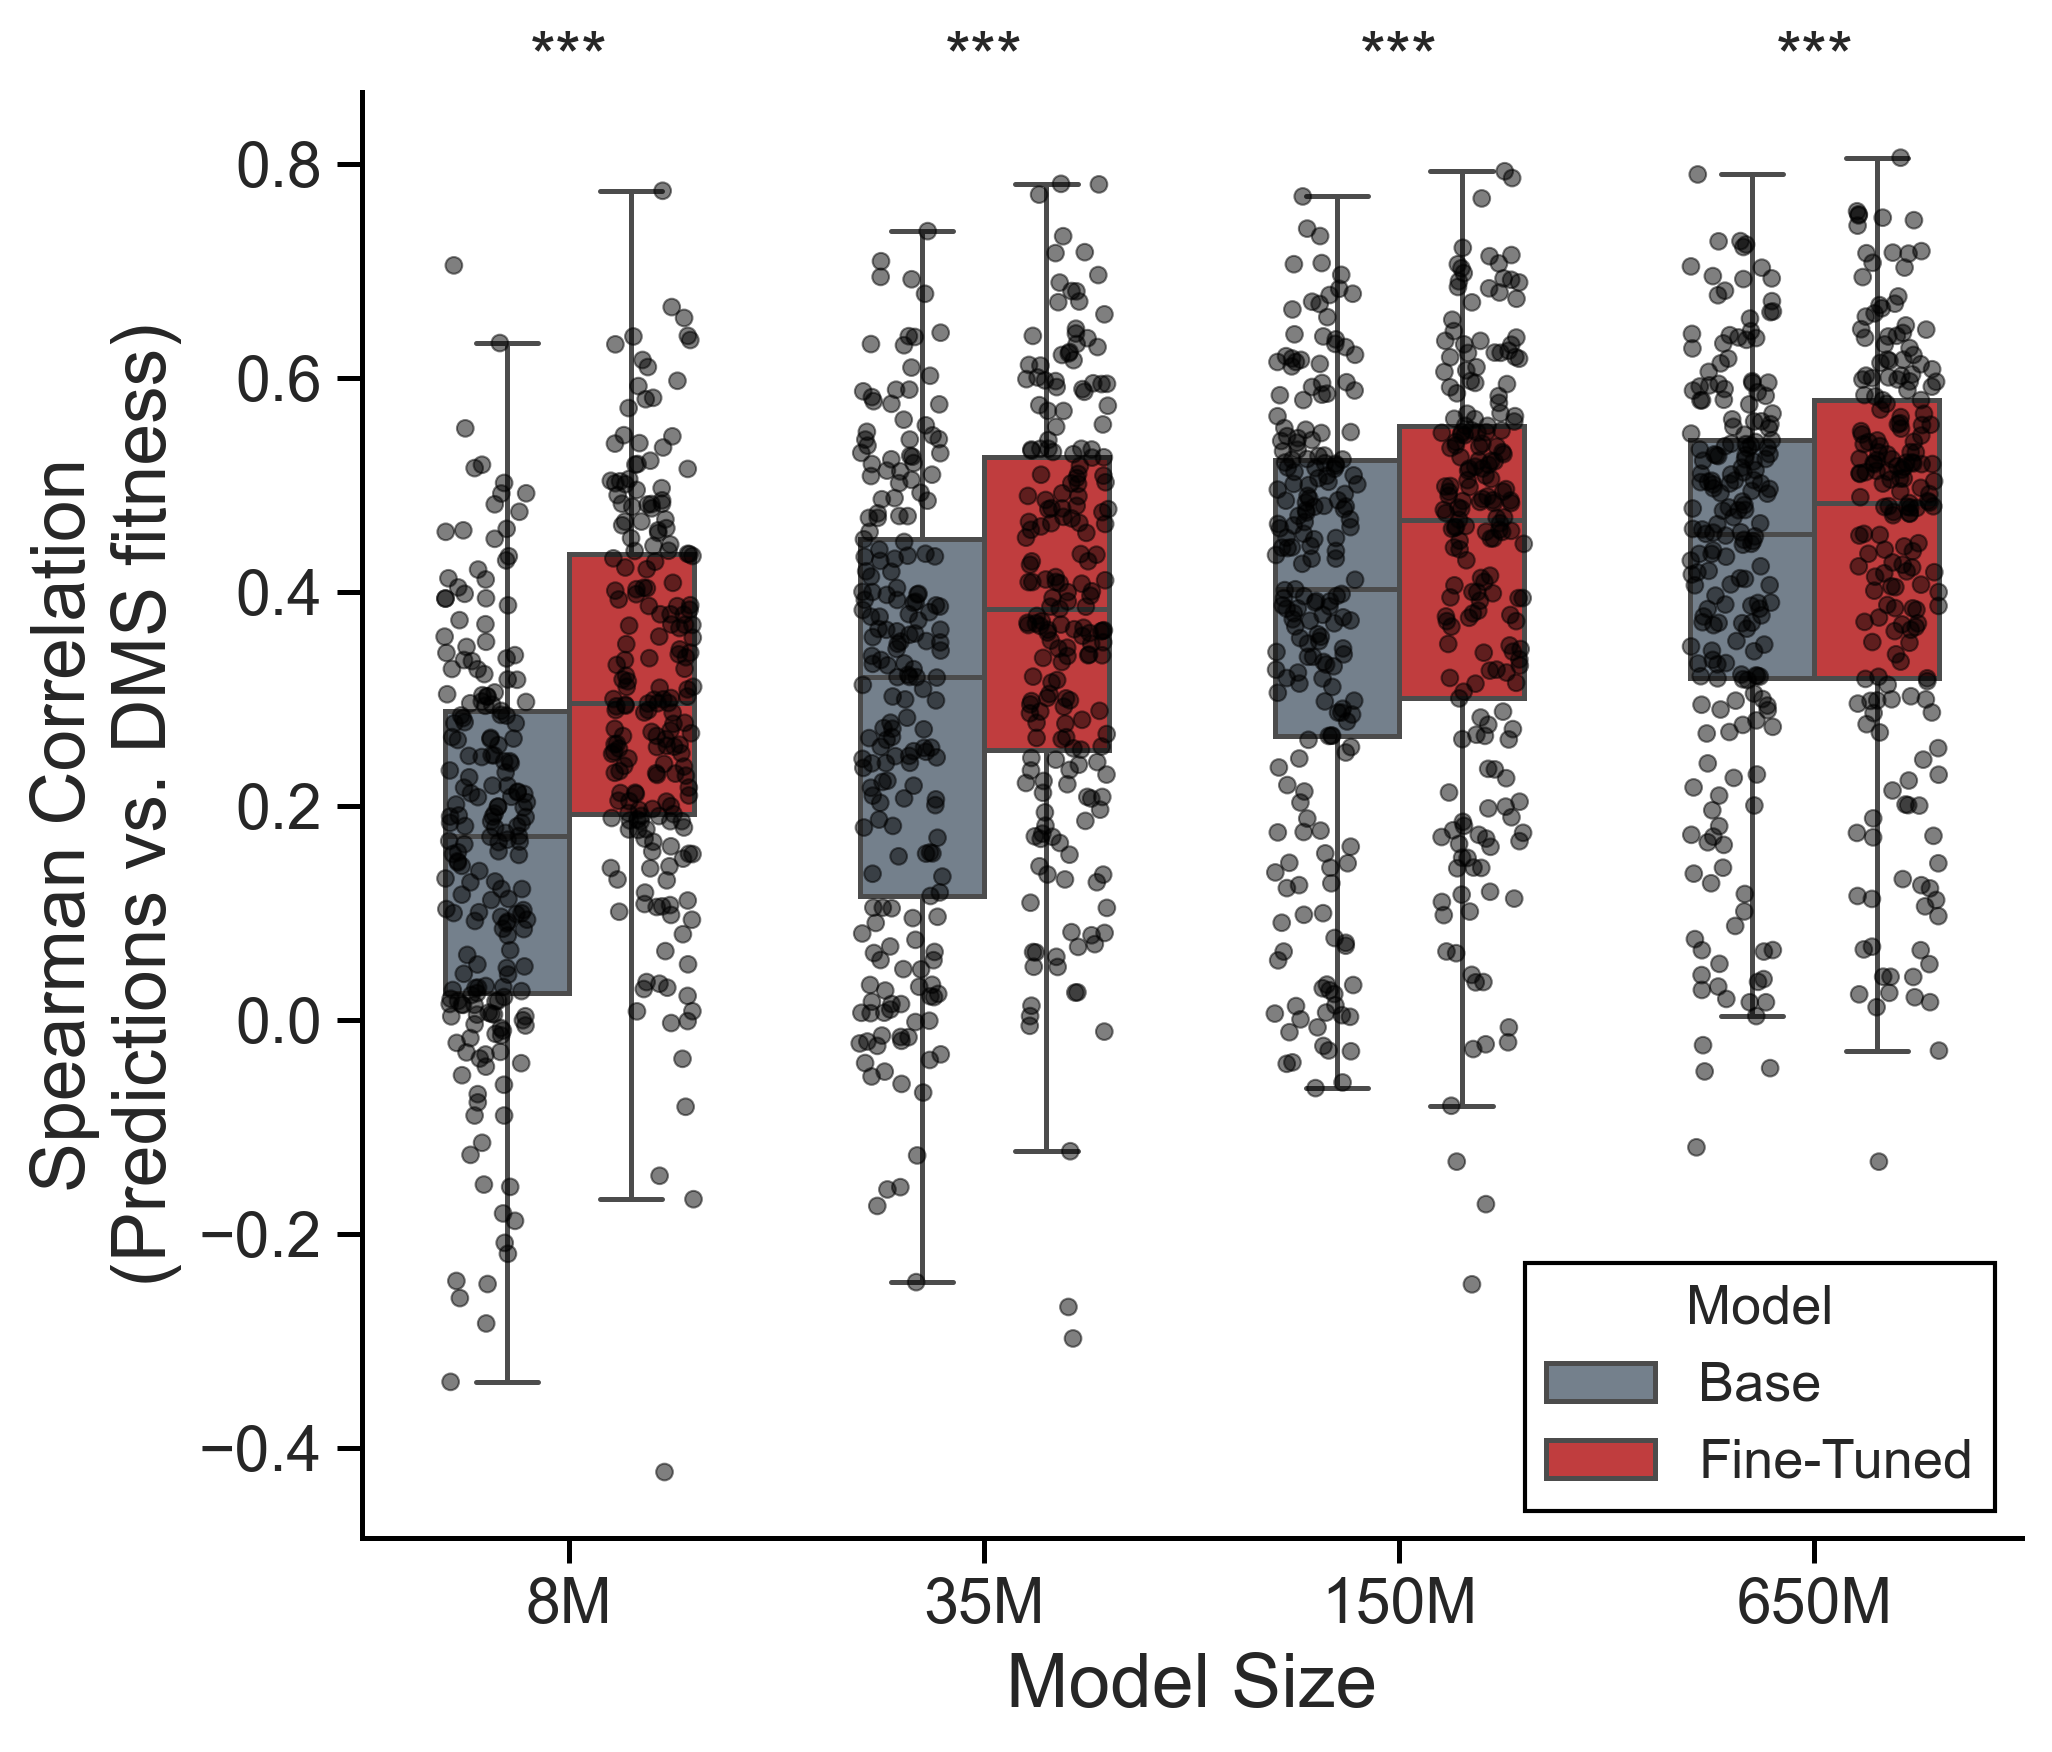

In [33]:
#@title Fig 5B
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.stats import wilcoxon
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

# ============================================================================
# CONFIGURATION
# ============================================================================
FIGURE_SIZE = (7, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 15
FONT_SIZE_LEGEND = 13
FONT_SIZE_TITLE = 13
FONT_SIZE_SIG = 16
SPINE_WIDTH = 1.2
BOX_WIDTH = 0.6
BOX_LINEWIDTH = 1.2
STRIP_SIZE = 4
STRIP_ALPHA = 0.5
STRIP_JITTER = 0.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# ============================================================================
# DATA LOADING AND PROCESSING
# ============================================================================
# Load the summary data ../proteingym_allftscores.csv
summary_df = pd.read_csv('proteingym_scores.csv', header=0)

# Convert wide → long format
melted_df = summary_df.melt(
    id_vars='taxon',
    value_vars=[
        'ESM_8M_base', 'ESM_35M', 'ESM_150M_base', 'ESM_650M',
        'ESM_8M_ft', 'ESM_35M_ft', 'ESM_150M_ft', 'ESM_650M_ft'
    ],
    var_name='Model',
    value_name='Score'
)

# Extract model size and status (base or fine-tuned)
melted_df['Model_Size'] = melted_df['Model'].str.extract(r'(\d+M)')
melted_df['Status'] = melted_df['Model'].apply(
    lambda x: 'Fine-Tuned' if '_ft' in x else 'Base'
)

# ============================================================================
# STATISTICAL ANALYSIS
# ============================================================================
# Map model sizes to their actual column names
model_config = {
    '8M': ('ESM_8M_base', 'ESM_8M_ft'),
    '35M': ('ESM_35M', 'ESM_35M_ft'),
    '150M': ('ESM_150M_base', 'ESM_150M_ft'),
    '650M': ('ESM_650M', 'ESM_650M_ft')
}

significance_dict = {}

print("=" * 60)
print("STATISTICAL ANALYSIS - Wilcoxon Signed-Rank Test")
print("=" * 60)

for size, (base_col, ft_col) in model_config.items():
    # Extract paired scores directly from summary_df
    base_scores = summary_df[base_col].dropna()
    ft_scores = summary_df[ft_col].dropna()

    # Ensure same proteins are used (in case of any missing values)
    valid_idx = base_scores.index.intersection(ft_scores.index)
    base_scores = base_scores.loc[valid_idx]
    ft_scores = ft_scores.loc[valid_idx]

    # Wilcoxon signed-rank test
    stat, p = wilcoxon(base_scores, ft_scores)

    # Print statistics
    print(f"\n{size} Model:")
    print(f"  Base median:       {base_scores.median():.4f}")
    print(f"  Fine-tuned median: {ft_scores.median():.4f}")
    print(f"  Wilcoxon p-value:  {p:.4e}")

    # Assign significance
    if p < 0.001:
        significance = '***'
    elif p < 0.01:
        significance = '**'
    elif p < 0.05:
        significance = '*'
    else:
        significance = 'ns'

    print(f"  Significance:      {significance}")
    significance_dict[size] = significance

print("=" * 60)

# ============================================================================
# COLOR PALETTE
# ============================================================================
# Nature-quality color scheme: Dark gray for base, muted red for fine-tuned
box_palette = ['#708090', '#d62728']    # base (dark gray), fine-tuned (muted red)
dot_palette = ['black', 'black']

# ============================================================================
# PLOTTING
# ============================================================================
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

# Boxplot
sns.boxplot(
    data=melted_df,
    x='Model_Size',
    y='Score',
    hue='Status',
    palette=box_palette,
    fliersize=0,
    width=BOX_WIDTH,
    linewidth=BOX_LINEWIDTH,
    ax=ax
)

# Stripplot
sns.stripplot(
    data=melted_df,
    x='Model_Size',
    y='Score',
    hue='Status',
    dodge=True,
    size=STRIP_SIZE,
    alpha=STRIP_ALPHA,
    jitter=STRIP_JITTER,
    palette=dot_palette,
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)

# ============================================================================
# LEGEND
# ============================================================================
# Remove duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(
    handles[:2],
    labels[:2],
    title="Model",
    fontsize=FONT_SIZE_LEGEND,
    loc='lower right',
    frameon=True,
    fancybox=False,
    edgecolor='black',
    framealpha=1
)

# Set Arial font for legend
for text in legend.get_texts():
    text.set_fontproperties(arial_font)
    text.set_fontsize(FONT_SIZE_LEGEND)
legend.get_title().set_fontproperties(arial_font)
legend.get_title().set_fontsize(FONT_SIZE_TITLE)

# ============================================================================
# AXES AND LABELS
# ============================================================================
# Axis labels
ax.set_xlabel("Model Size", fontsize=FONT_SIZE_LABELS, fontproperties=arial_font)
ax.set_ylabel("Spearman Correlation \n (Predictions vs. DMS fitness)", fontsize=FONT_SIZE_LABELS, fontproperties=arial_font)

# Tick labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

# ============================================================================
# SPINES AND TICKS
# ============================================================================
# Remove top and right spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Format left and bottom spines
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
    ax.spines[spine].set_color('black')

# Tick parameters
ax.tick_params(
    which='both',
    bottom=True,
    left=True,
    top=False,
    right=False,
    width=SPINE_WIDTH,
    color='black',
    labelsize=FONT_SIZE_TICKS
)

# ============================================================================
# SIGNIFICANCE ANNOTATIONS
# ============================================================================
y_max = melted_df['Score'].max()
y_min = melted_df['Score'].min()
y_offset = (y_max - y_min) * 0.05  # vertical spacing

model_sizes = ['8M', '35M', '150M', '650M']
for i, size in enumerate(model_sizes):
    sig = significance_dict[size]
    if sig != 'ns':
        ax.text(
            i,
            y_max + y_offset,
            sig,
            ha='center',
            va='bottom',
            fontsize=FONT_SIZE_SIG,
            fontproperties=arial_font,
            fontweight='bold'
        )

# ============================================================================
# FINALIZE AND SAVE
# ============================================================================
plt.tight_layout()

# Save in multiple formats
plt.savefig("fig5b_ESM_boxplot.svg", format="svg", dpi=DPI, bbox_inches='tight')
# plt.savefig("fig5b_ESM_boxplot.png", format="png", dpi=DPI, bbox_inches='tight')
# plt.savefig("fig5b_ESM_boxplot.pdf", format="pdf", dpi=DPI, bbox_inches='tight')

print("\n" + "=" * 60)
print("FIGURE SAVED:")
print("  - fig5b_ESM_boxplot.svg")
# print("  - fig5b_ESM_boxplot.png")
# print("  - fig5b_ESM_boxplot.pdf")
print("=" * 60)

plt.show()

<>:257: SyntaxWarning: invalid escape sequence '\m'
<>:257: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-4049440503.py:257: SyntaxWarning: invalid escape sequence '\m'
  f'$\mathit{{p}}$={p_val:.3f}',
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


STATISTICAL ANALYSIS - Wilcoxon Signed-Rank Test

Prokaryote:
  Base median:       0.4870
  Fine-tuned median: 0.5159
  n (paired obs):    50
  Wilcoxon p-value:  1.7789e-04
  Significance:      ***

Eukaryote:
  Base median:       0.4453
  Fine-tuned median: 0.5113
  n (paired obs):    39
  Wilcoxon p-value:  9.4260e-04
  Significance:      ***

Human:
  Base median:       0.4587
  Fine-tuned median: 0.4792
  n (paired obs):    89
  Wilcoxon p-value:  2.0542e-01
  Significance:      ns

Virus:
  Base median:       0.1426
  Fine-tuned median: 0.2017
  n (paired obs):    23
  Wilcoxon p-value:  1.5107e-01
  Significance:      ns

FIGURE SAVED:
  - ESM_8M_boxplot_taxon.svg
  - ESM_8M_boxplot_taxon.png
  - ESM_8M_boxplot_taxon.pdf


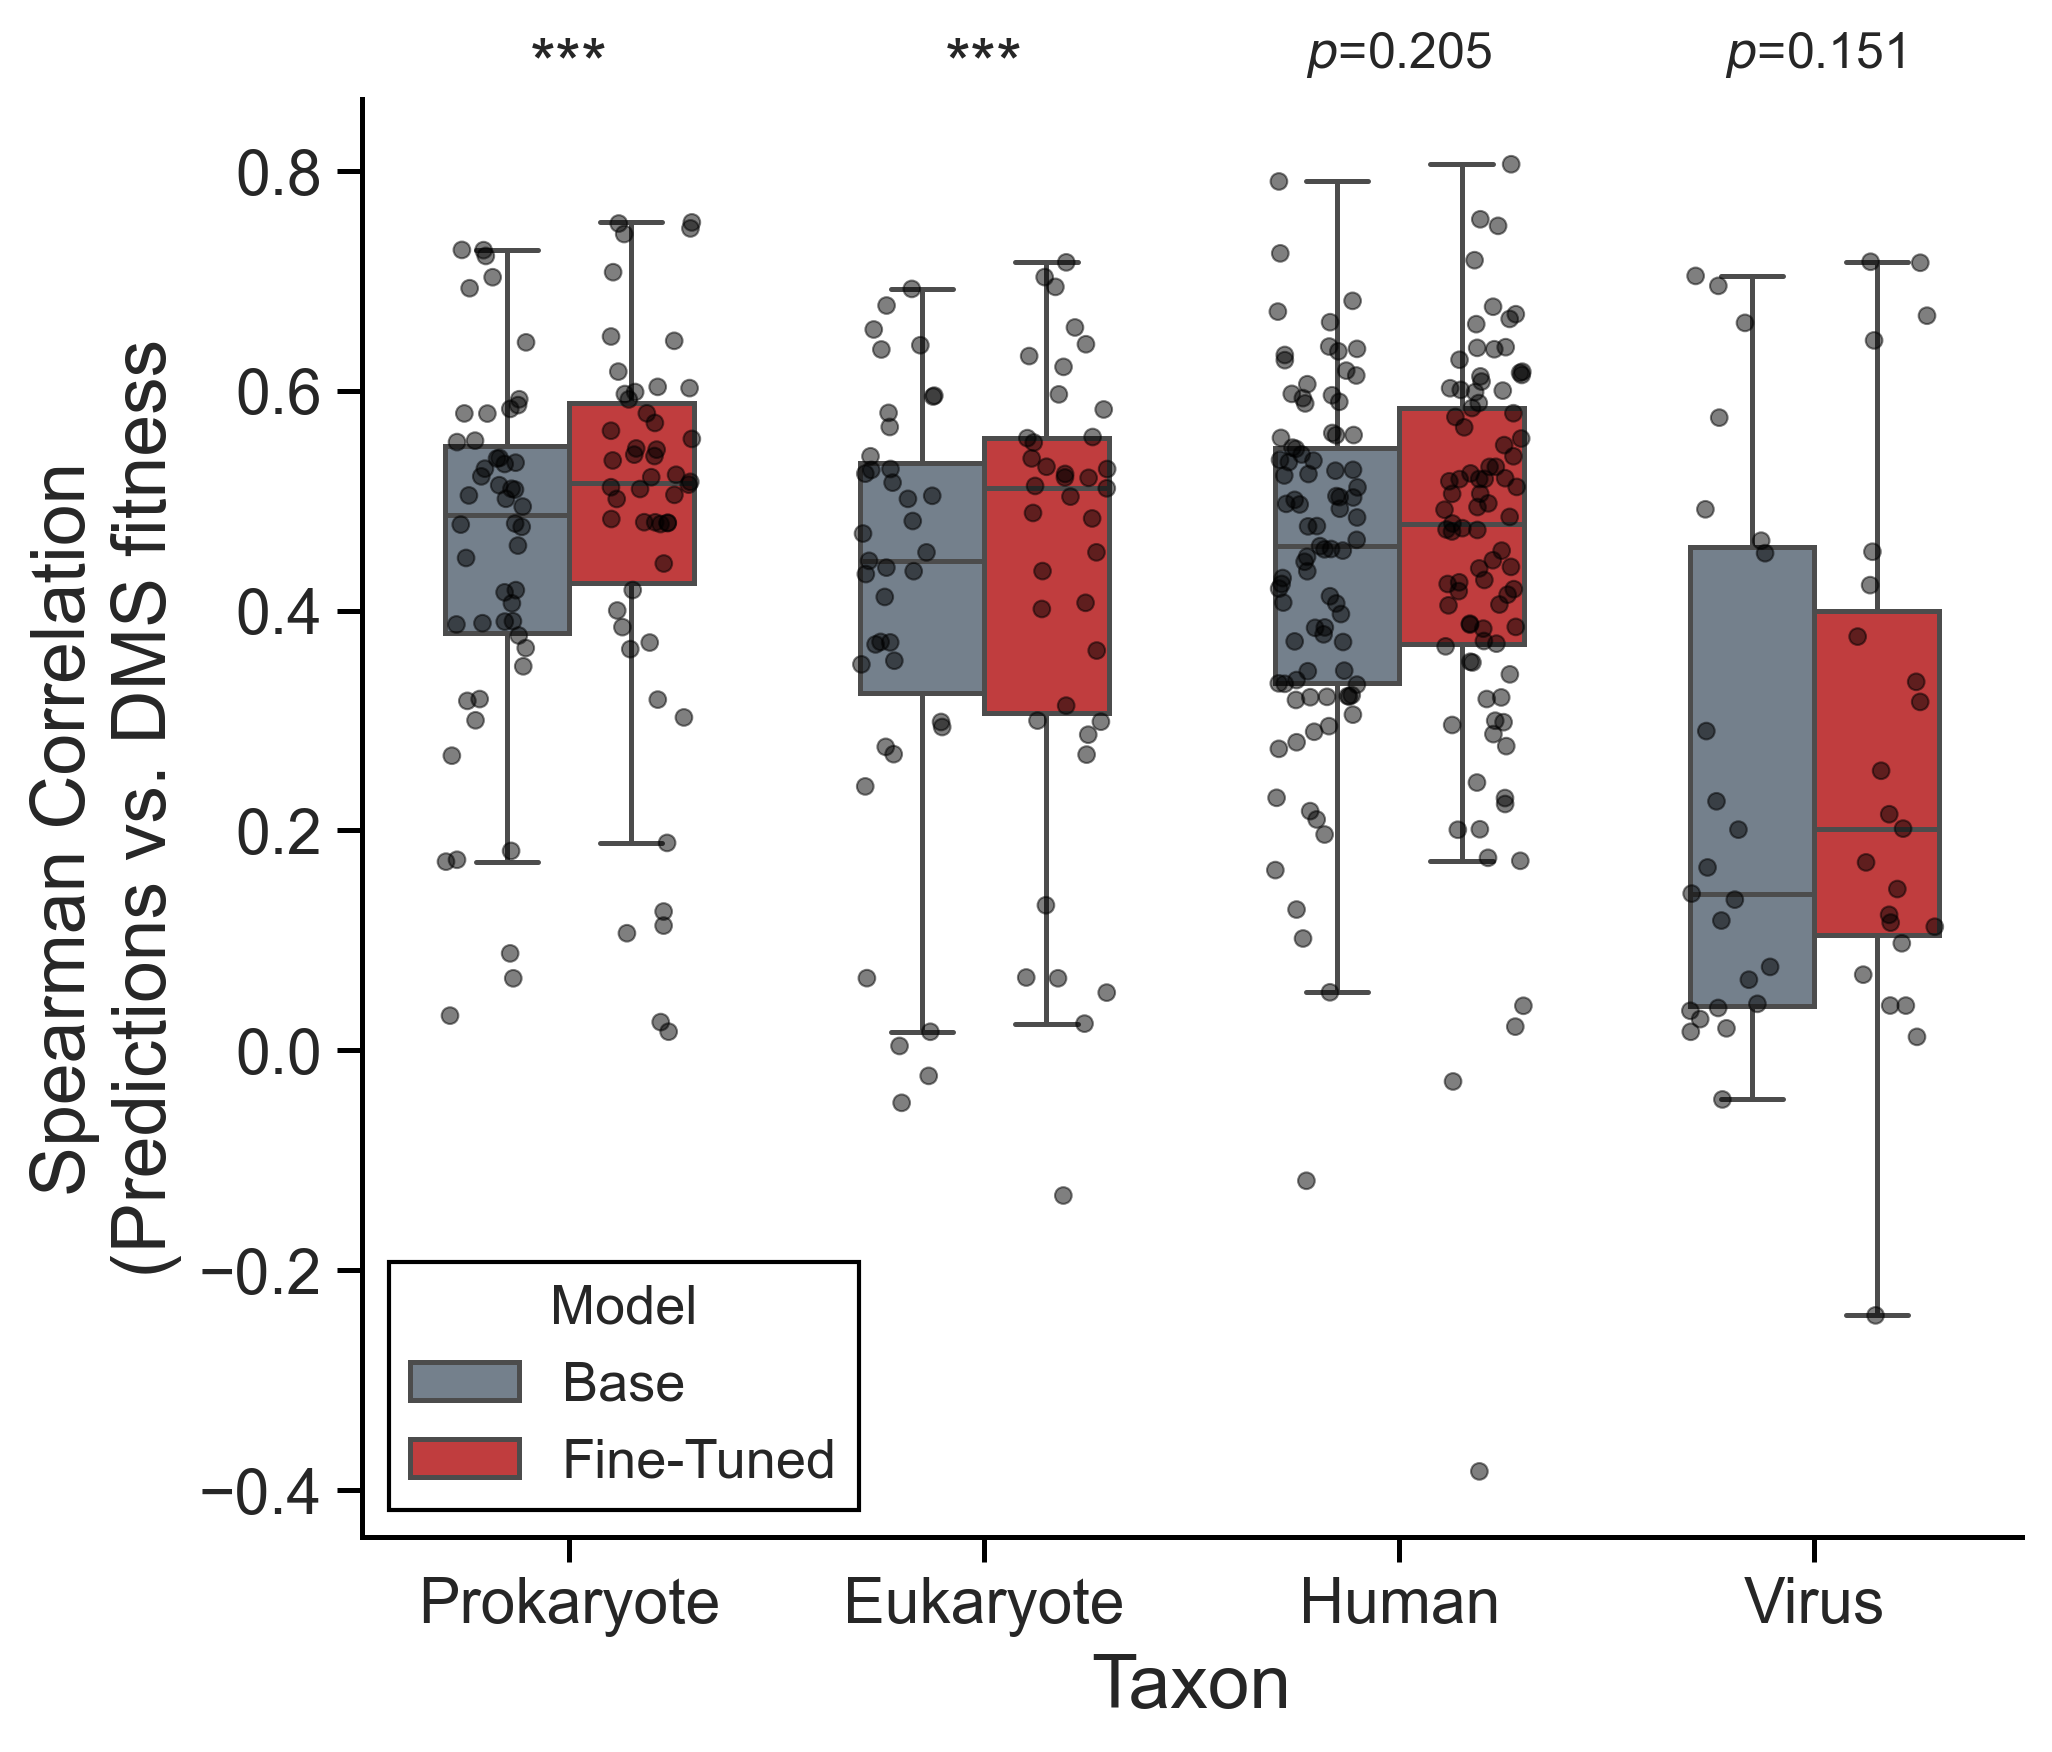

In [34]:
#@title Fig 5C

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.stats import wilcoxon
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

# ============================================================================
# CONFIGURATION
# ============================================================================
FIGURE_SIZE = (7, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 15
FONT_SIZE_LEGEND = 13
FONT_SIZE_TITLE = 13
FONT_SIZE_SIG = 16
FONT_SIZE_PVAL = 12
SPINE_WIDTH = 1.2
BOX_WIDTH = 0.6
BOX_LINEWIDTH = 1.2
STRIP_SIZE = 4
STRIP_ALPHA = 0.5
STRIP_JITTER = 0.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# ============================================================================
# DATA LOADING AND PROCESSING
# ============================================================================
# Load the summary data
summary_df = pd.read_csv('proteingym_scores.csv', header=0)

# Define the desired order of taxa
taxon_order = ['Prokaryote', 'Eukaryote', 'Human', 'Virus']

# Melt data
melted_df = summary_df.melt(
    id_vars='taxon',
    value_vars=['ESM_650M', 'ESM_650M_ft'],
    var_name='Model',
    value_name='Score'
)

# Add Base / Fine-tuned labels
melted_df['Status'] = melted_df['Model'].apply(
    lambda x: 'Fine-Tuned' if '_ft' in x else 'Base'
)

# Convert taxon to categorical with specified order
melted_df['taxon'] = pd.Categorical(
    melted_df['taxon'],
    categories=taxon_order,
    ordered=True
)

# ============================================================================
# COLOR PALETTE
# ============================================================================
# Publication-quality color scheme: Dark gray for base, red for fine-tuned
box_palette = ['#708090', '#d62728']     # base (dark gray), fine-tuned (red)
dot_palette = ['black', 'black']

# ============================================================================
# STATISTICAL ANALYSIS
# ============================================================================
significance_dict = {}
pvalue_dict = {}

print("=" * 60)
print("STATISTICAL ANALYSIS - Wilcoxon Signed-Rank Test")
print("=" * 60)

for taxon in taxon_order:
    # Filter data for this taxon
    subset = summary_df[summary_df['taxon'] == taxon]

    # Extract paired scores
    base_scores = subset['ESM_650M'].dropna()
    ft_scores = subset['ESM_650M_ft'].dropna()

    # Ensure same proteins are used
    valid_idx = base_scores.index.intersection(ft_scores.index)
    base_scores = base_scores.loc[valid_idx]
    ft_scores = ft_scores.loc[valid_idx]

    # Print statistics
    print(f"\n{taxon}:")
    print(f"  Base median:       {base_scores.median():.4f}")
    print(f"  Fine-tuned median: {ft_scores.median():.4f}")
    print(f"  n (paired obs):    {len(base_scores)}")

    # Check if we have enough data
    if len(base_scores) == 0 or len(ft_scores) == 0:
        print(f"  WARNING: Not enough data")
        significance_dict[taxon] = 'ns'
        pvalue_dict[taxon] = None
    elif len(base_scores) < 3:
        print(f"  WARNING: Very few observations")
        significance_dict[taxon] = 'ns'
        pvalue_dict[taxon] = None
    else:
        try:
            # Wilcoxon signed-rank test
            stat, p = wilcoxon(base_scores, ft_scores)
            pvalue_dict[taxon] = p

            # Assign significance
            if p < 0.001:
                significance = '***'
            elif p < 0.01:
                significance = '**'
            elif p < 0.05:
                significance = '*'
            else:
                significance = 'ns'

            significance_dict[taxon] = significance
            print(f"  Wilcoxon p-value:  {p:.4e}")
            print(f"  Significance:      {significance}")
        except Exception as e:
            print(f"  WARNING: Could not compute test: {e}")
            significance_dict[taxon] = 'ns'
            pvalue_dict[taxon] = None

print("=" * 60)

# ============================================================================
# PLOTTING
# ============================================================================
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

# Boxplot
sns.boxplot(
    data=melted_df,
    x='taxon',
    y='Score',
    hue='Status',
    palette=box_palette,
    fliersize=0,
    width=BOX_WIDTH,
    linewidth=BOX_LINEWIDTH,
    order=taxon_order,
    ax=ax
)

# Stripplot
sns.stripplot(
    data=melted_df,
    x='taxon',
    y='Score',
    hue='Status',
    dodge=True,
    size=STRIP_SIZE,
    alpha=STRIP_ALPHA,
    jitter=STRIP_JITTER,
    palette=dot_palette,
    edgecolor='black',
    linewidth=0.5,
    order=taxon_order,
    ax=ax
)

# ============================================================================
# LEGEND
# ============================================================================
# Remove duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(
    handles[:2],
    labels[:2],
    title="Model",
    fontsize=FONT_SIZE_LEGEND,
    loc='lower left',
    frameon=True,
    fancybox=False,
    edgecolor='black',
    framealpha=1
)

# Set Arial font for legend
for text in legend.get_texts():
    text.set_fontproperties(arial_font)
    text.set_fontsize(FONT_SIZE_LEGEND)
legend.get_title().set_fontproperties(arial_font)
legend.get_title().set_fontsize(FONT_SIZE_TITLE)

# ============================================================================
# AXES AND LABELS
# ============================================================================
# Axis labels
ax.set_xlabel("Taxon", fontsize=FONT_SIZE_LABELS, fontproperties=arial_font)
ax.set_ylabel("Spearman Correlation \n (Predictions vs. DMS fitness", fontsize=FONT_SIZE_LABELS, fontproperties=arial_font)

# Tick labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

# ============================================================================
# SPINES AND TICKS
# ============================================================================
# Remove top and right spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Format left and bottom spines
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
    ax.spines[spine].set_color('black')

# Tick parameters
ax.tick_params(
    which='both',
    bottom=True,
    left=True,
    top=False,
    right=False,
    width=SPINE_WIDTH,
    color='black',
    labelsize=FONT_SIZE_TICKS
)

# ============================================================================
# SIGNIFICANCE ANNOTATIONS
# ============================================================================
y_max = melted_df['Score'].max()
y_min = melted_df['Score'].min()
y_offset = (y_max - y_min) * 0.05

for i, taxon in enumerate(taxon_order):
    sig = significance_dict.get(taxon, 'ns')
    p_val = pvalue_dict.get(taxon)

    if sig != 'ns':
        # Show asterisks for significant results
        ax.text(
            i,
            y_max + y_offset,
            sig,
            ha='center',
            va='bottom',
            fontsize=FONT_SIZE_SIG,
            fontproperties=arial_font,
            fontweight='bold'
        )
    elif p_val is not None:
        # Show p-value for non-significant results
        ax.text(
            i,
            y_max + y_offset * 1.3,
            f'$\mathit{{p}}$={p_val:.3f}',
            ha='center',
            va='bottom',
            fontsize=FONT_SIZE_PVAL,
            fontproperties=arial_font
        )

# ============================================================================
# FINALIZE AND SAVE
# ============================================================================
plt.tight_layout()

# Save in multiple formats
plt.savefig("ESM_8M_boxplot_taxon.svg", format="svg", dpi=DPI, bbox_inches='tight')
plt.savefig("ESM_8M_boxplot_taxon.png", format="png", dpi=DPI, bbox_inches='tight')
plt.savefig("ESM_8M_boxplot_taxon.pdf", format="pdf", dpi=DPI, bbox_inches='tight')

print("\n" + "=" * 60)
print("FIGURE SAVED:")
print("  - ESM_8M_boxplot_taxon.svg")
print("  - ESM_8M_boxplot_taxon.png")
print("  - ESM_8M_boxplot_taxon.pdf")
print("=" * 60)

plt.show()

<>:270: SyntaxWarning: invalid escape sequence '\m'
<>:270: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-1881488199.py:270: SyntaxWarning: invalid escape sequence '\m'
  f'$\mathit{{p}}$={p_val:.3f}',
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/tmp/ipython-input-1881488199.py:211: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


STATISTICAL ANALYSIS - Wilcoxon Signed-Rank Test

Stability:
  Base median:       0.4758
  Fine-tuned median: 0.5251
  n (paired obs):    66
  Wilcoxon p-value:  2.0285e-07
  Significance:      ***

Activity:
  Base median:       0.4959
  Fine-tuned median: 0.5185
  n (paired obs):    38
  Wilcoxon p-value:  4.4697e-03
  Significance:      **

OrganismalFitness:
  Base median:       0.4243
  Fine-tuned median: 0.4428
  n (paired obs):    69
  Wilcoxon p-value:  3.5588e-02
  Significance:      *

Expression:
  Base median:       0.4705
  Fine-tuned median: 0.4217
  n (paired obs):    16
  Wilcoxon p-value:  4.1809e-03
  Significance:      **

Binding:
  Base median:       0.3217
  Fine-tuned median: 0.3013
  n (paired obs):    12
  Wilcoxon p-value:  3.3936e-01
  Significance:      ns

FIGURE SAVED:
  - dms_selection_type_boxplot.svg
  - dms_selection_type_boxplot.png
  - dms_selection_type_boxplot.pdf


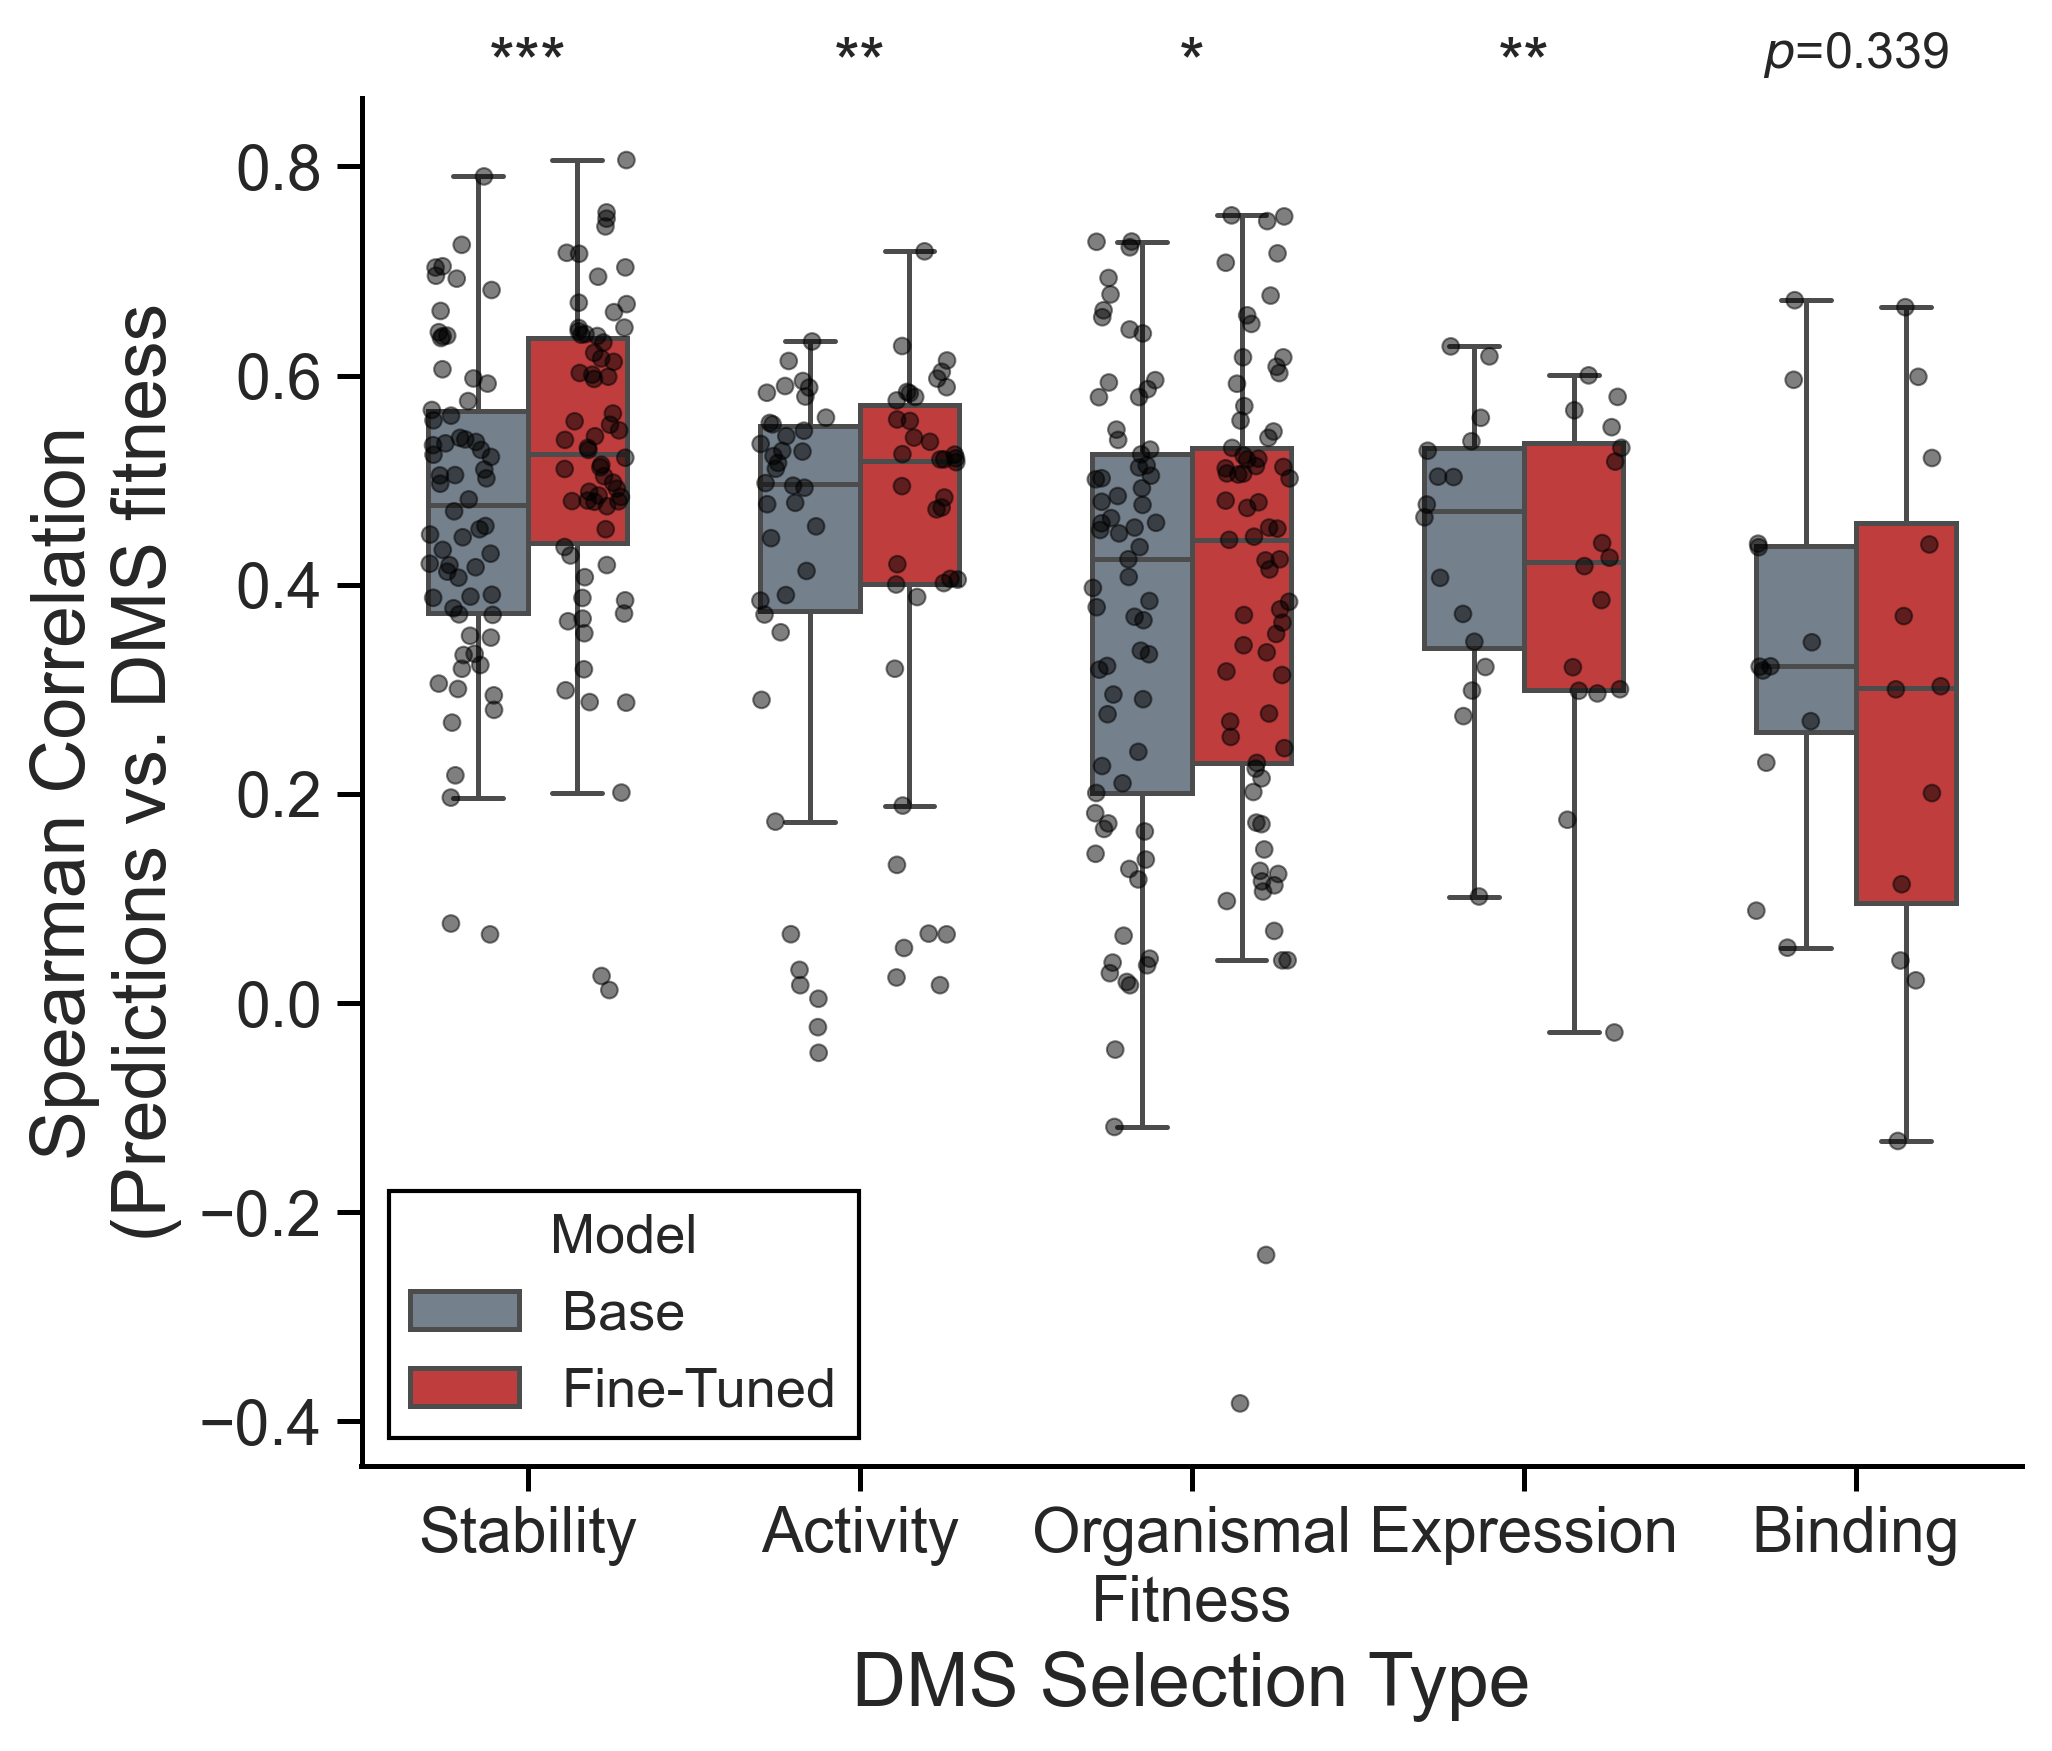

In [35]:
#@title Fig 5D

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.stats import wilcoxon
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

# ============================================================================
# CONFIGURATION
# ============================================================================
FIGURE_SIZE = (7, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 15
FONT_SIZE_LEGEND = 13
FONT_SIZE_TITLE = 13
FONT_SIZE_SIG = 16
FONT_SIZE_PVAL = 12
SPINE_WIDTH = 1.2
BOX_WIDTH = 0.6
BOX_LINEWIDTH = 1.2
STRIP_SIZE = 4
STRIP_ALPHA = 0.5
STRIP_JITTER = 0.2


# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# ============================================================================
# DATA LOADING AND PROCESSING
# ============================================================================
# Load the summary data
summary_df = pd.read_csv('proteingym_scores.csv', header=0)

# Define category order
category_order = ['Stability', 'Activity', 'OrganismalFitness', 'Expression', 'Binding']

# Melt data
melted_df = summary_df.melt(
    id_vars='coarse_selection_type',
    value_vars=['ESM_650M', 'ESM_650M_ft'],
    var_name='Model',
    value_name='Score'
)

# Add Base / Fine-tuned labels
melted_df['Status'] = melted_df['Model'].apply(
    lambda x: 'Fine-Tuned' if '_ft' in x else 'Base'
)

# Convert coarse_selection_type to categorical with specified order
melted_df['coarse_selection_type'] = pd.Categorical(
    melted_df['coarse_selection_type'],
    categories=category_order,
    ordered=True
)

# ============================================================================
# COLOR PALETTE
# ============================================================================
# Nature-quality color scheme: Dark gray for base, red for fine-tuned
box_palette = ['#708090', '#d62728']     # base (dark gray), fine-tuned (red)
dot_palette = ['black', 'black']

# ============================================================================
# STATISTICAL ANALYSIS
# ============================================================================
selection_types = category_order
significance_dict = {}
pvalue_dict = {}

print("=" * 60)
print("STATISTICAL ANALYSIS - Wilcoxon Signed-Rank Test")
print("=" * 60)

for sel_type in selection_types:
    # Filter data for this selection type
    subset = summary_df[summary_df['coarse_selection_type'] == sel_type]

    # Extract paired scores
    base_scores = subset['ESM_650M'].dropna()
    ft_scores = subset['ESM_650M_ft'].dropna()

    # Ensure same proteins are used
    valid_idx = base_scores.index.intersection(ft_scores.index)
    base_scores = base_scores.loc[valid_idx]
    ft_scores = ft_scores.loc[valid_idx]

    # Print statistics
    print(f"\n{sel_type}:")
    print(f"  Base median:       {base_scores.median():.4f}")
    print(f"  Fine-tuned median: {ft_scores.median():.4f}")
    print(f"  n (paired obs):    {len(base_scores)}")

    # Check if we have enough data
    if len(base_scores) == 0 or len(ft_scores) == 0:
        print(f"  WARNING: Not enough data")
        significance_dict[sel_type] = 'ns'
        pvalue_dict[sel_type] = None
    elif len(base_scores) < 3:
        print(f"  WARNING: Very few observations")
        significance_dict[sel_type] = 'ns'
        pvalue_dict[sel_type] = None
    else:
        try:
            # Wilcoxon signed-rank test
            stat, p = wilcoxon(base_scores, ft_scores)
            pvalue_dict[sel_type] = p

            # Assign significance
            if p < 0.001:
                significance = '***'
            elif p < 0.01:
                significance = '**'
            elif p < 0.05:
                significance = '*'
            else:
                significance = 'ns'

            significance_dict[sel_type] = significance
            print(f"  Wilcoxon p-value:  {p:.4e}")
            print(f"  Significance:      {significance}")
        except Exception as e:
            print(f"  WARNING: Could not compute test: {e}")
            significance_dict[sel_type] = 'ns'
            pvalue_dict[sel_type] = None

print("=" * 60)

# ============================================================================
# PLOTTING
# ============================================================================
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

# Boxplot
sns.boxplot(
    data=melted_df,
    x='coarse_selection_type',
    y='Score',
    hue='Status',
    palette=box_palette,
    fliersize=0,
    width=BOX_WIDTH,
    linewidth=BOX_LINEWIDTH,
    order=category_order,
    ax=ax
)

# Stripplot
sns.stripplot(
    data=melted_df,
    x='coarse_selection_type',
    y='Score',
    hue='Status',
    dodge=True,
    size=STRIP_SIZE,
    alpha=STRIP_ALPHA,
    jitter=STRIP_JITTER,
    palette=dot_palette,
    edgecolor='black',
    linewidth=0.5,
    order=category_order,
    ax=ax
)

# ============================================================================
# LEGEND
# ============================================================================
# Remove duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(
    handles[:2],
    labels[:2],
    title="Model",
    fontsize=FONT_SIZE_LEGEND,
    loc='lower left',
    frameon=True,
    fancybox=False,
    edgecolor='black',
    framealpha=1
)

# Set Arial font for legend
for text in legend.get_texts():
    text.set_fontproperties(arial_font)
    text.set_fontsize(FONT_SIZE_LEGEND)
legend.get_title().set_fontproperties(arial_font)
legend.get_title().set_fontsize(FONT_SIZE_TITLE)

# ============================================================================
# AXES AND LABELS
# ============================================================================
# Axis labels
ax.set_xlabel("DMS Selection Type", fontsize=FONT_SIZE_LABELS, fontproperties=arial_font)
ax.set_ylabel("Spearman Correlation \n (Predictions vs. DMS fitness", fontsize=FONT_SIZE_LABELS, fontproperties=arial_font)

# Format x-axis labels to split OrganismalFitness into two lines
xticklabels = []
for label in ax.get_xticklabels():
    text = label.get_text()
    if text == 'OrganismalFitness':
        xticklabels.append('Organismal\nFitness')
    else:
        xticklabels.append(text)

ax.set_xticklabels(xticklabels)

# Tick labels - apply font properties
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

# ============================================================================
# SPINES AND TICKS
# ============================================================================
# Remove top and right spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Format left and bottom spines
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
    ax.spines[spine].set_color('black')

# Tick parameters
ax.tick_params(
    which='both',
    bottom=True,
    left=True,
    top=False,
    right=False,
    width=SPINE_WIDTH,
    color='black',
    labelsize=FONT_SIZE_TICKS
)

# ============================================================================
# SIGNIFICANCE ANNOTATIONS
# ============================================================================
y_max = melted_df['Score'].max()
y_min = melted_df['Score'].min()
y_offset = (y_max - y_min) * 0.05

for i, sel_type in enumerate(selection_types):
    sig = significance_dict.get(sel_type, 'ns')
    p_val = pvalue_dict.get(sel_type)

    if sig != 'ns':
        # Show asterisks for significant results
        ax.text(
            i,
            y_max + y_offset,
            sig,
            ha='center',
            va='bottom',
            fontsize=FONT_SIZE_SIG,
            fontproperties=arial_font,
            fontweight='bold'
        )
    elif p_val is not None:
        # Show p-value for non-significant results
        ax.text(
            i,
            y_max + y_offset * 1.3,
            f'$\mathit{{p}}$={p_val:.3f}',
            ha='center',
            va='bottom',
            fontsize=FONT_SIZE_PVAL,
            fontproperties=arial_font
        )

# ============================================================================
# FINALIZE AND SAVE
# ============================================================================
plt.tight_layout()

# Save in multiple formats
plt.savefig("dms_selection_type_boxplot.svg", format="svg", dpi=DPI, bbox_inches='tight')
plt.savefig("dms_selection_type_boxplot.png", format="png", dpi=DPI, bbox_inches='tight')
plt.savefig("dms_selection_type_boxplot.pdf", format="pdf", dpi=DPI, bbox_inches='tight')

print("\n" + "=" * 60)
print("FIGURE SAVED:")
print("  - dms_selection_type_boxplot.svg")
print("  - dms_selection_type_boxplot.png")
print("  - dms_selection_type_boxplot.pdf")
print("=" * 60)

plt.show()

In [30]:
#@title Fig 6A
"""
Figure 6A left: Correlation between Δ Spearman and Δ NDCG@Top10% for ESM 650M model
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.stats import pearsonr

# Configuration
FIGURE_SIZE = (8, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
FONT_SIZE_LEGEND = 18
FONT_SIZE_TEXT = 18
SCATTER_SIZE = 80
SCATTER_ALPHA = 0.4  # Changed to be more transparent
SPINE_WIDTH = 1.2

# Colors
COLOR_SCATTER = 'black'  # Changed from royalblue to black
COLOR_EDGE = 'black'
COLOR_TREND = 'black'  # Changed from red to black

# File paths
DATA_FILE = 'proteingym_scores.csv'
OUTPUT_FILE = 'Delta_ESM_vs_NDCG_top_650M_scatter.svg'

def load_arial_font():
    """Load Arial font for publication quality text"""
    try:
        return fm.FontProperties(fname="arial.ttf")
    except:
        print("Warning: Arial font not found. Using default font.")
        return fm.FontProperties()

def prepare_data(filepath):
    """Load and prepare data with computed deltas"""
    df = pd.read_csv(filepath, header=0)

    # Compute deltas for 650M model
    df['Delta_ESM_650M'] = df['ESM_650M_ft'] - df['ESM_650M']
    df['Delta_NDCG_650M'] = df['NDCG_650M_ft'] - df['NDCG_650M_base']

    # Remove any rows with NaN values
    df_clean = df[['Delta_ESM_650M', 'Delta_NDCG_650M']].dropna()

    return df_clean

def calculate_statistics(x, y):
    """Calculate Pearson correlation and trend line"""
    # Pearson correlation (changed from Spearman)
    r, pval = pearsonr(x, y)

    # Linear fit for trend line
    coeffs = np.polyfit(x, y, 1)

    return r, pval, coeffs

def create_publication_plot(df, arial_font):
    """Create the main scatter plot with all styling"""
    fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

    # Extract data
    x = df['Delta_ESM_650M']
    y = df['Delta_NDCG_650M']

    # Scatter plot
    ax.scatter(
        x, y,
        color=COLOR_SCATTER,
        edgecolor=COLOR_EDGE,
        alpha=SCATTER_ALPHA,
        s=SCATTER_SIZE,
        linewidths=0.5,
        zorder=3
    )

    # Calculate statistics
    r, pval, coeffs = calculate_statistics(x, y)
    m, b = coeffs

    # Trend line
    x_trend = np.array([x.min(), x.max()])
    y_trend = m * x_trend + b
    ax.plot(
        x_trend, y_trend,
        color=COLOR_TREND,
        linewidth=2,
        label=f'Linear fit (y = {m:.2f}x + {b:.2f})',
        zorder=2
    )

    # Add correlation statistics (changed to Pearson)
    stats_text = f'Pearson r = {r:.3f}\np = {pval:.2e}'
    ax.text(
        0.05, 0.95,
        stats_text,
        transform=ax.transAxes,
        fontsize=FONT_SIZE_TEXT,
        fontproperties=arial_font,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray')
    )

    # Axis labels
    ax.set_xlabel(
        'Δ Spearman Correlation',
        fontsize=FONT_SIZE_LABELS,
        fontproperties=arial_font,
        fontweight='normal'
    )
    ax.set_ylabel(
        'Δ NDCG@Top10%',
        fontsize=FONT_SIZE_LABELS,
        fontproperties=arial_font,
        fontweight='normal'
    )

    # Tick formatting
    ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS, bottom=True, left=True)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(arial_font)
        label.set_fontsize(FONT_SIZE_TICKS)

    # Grid (optional - uncomment if desired)
    # ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, zorder=1)

    # Spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_linewidth(SPINE_WIDTH)
        ax.spines[spine].set_color('black')

    # Legend
    ax.legend(
        fontsize=FONT_SIZE_LEGEND,
        prop=arial_font,
        frameon=True,
        loc='lower right'
    )

    # Tight layout
    plt.tight_layout()

    return fig, ax, r, pval

def main():
    """Main execution function"""
    # Load font
    arial_font = load_arial_font()

    # Load and prepare data
    print(f"Loading data from {DATA_FILE}...")
    df = prepare_data(DATA_FILE)
    print(f"Data loaded: {len(df)} points")

    # Create plot
    print("Creating publication-quality plot...")
    fig, ax, r, pval = create_publication_plot(df, arial_font)

    # Save figure
    print(f"Saving figure to {OUTPUT_FILE}...")
    plt.savefig(OUTPUT_FILE, dpi=DPI, format='svg', bbox_inches='tight')

    # Also save as high-res PNG for presentations
    png_file = OUTPUT_FILE.replace('.svg', '.png')
    plt.savefig(png_file, dpi=DPI, format='png', bbox_inches='tight')

    print(f"Figures saved:")
    print(f"  - {OUTPUT_FILE}")
    print(f"  - {png_file}")
    print(f"\nStatistics:")
    print(f"  Pearson r = {r:.4f}")
    print(f"  p-value = {pval:.4e}")

    # Display
    plt.show()

if __name__ == "__main__":
    main()

Loading data from proteingym_scores.csv...
Data loaded: 201 points
Creating publication-quality plot...
Saving figure to Delta_ESM_vs_NDCG_top_650M_scatter.svg...
Figures saved:
  - Delta_ESM_vs_NDCG_top_650M_scatter.svg
  - Delta_ESM_vs_NDCG_top_650M_scatter.png

Statistics:
  Pearson r = 0.6603
  p-value = 1.5277e-26


In [31]:
#@title Fig 6B
"""
Figure 6A right: Correlation between Δ Spearman and Δ ROC for ESM 650M model
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.stats import pearsonr

# Configuration
FIGURE_SIZE = (8, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
FONT_SIZE_LEGEND = 18
SCATTER_SIZE = 80
SCATTER_ALPHA = 0.4
SPINE_WIDTH = 1.2

# Colors
COLOR_SCATTER = 'black'
COLOR_EDGE = 'black'
COLOR_TREND = 'black'

# File paths
DATA_FILE = 'proteingym_scores.csv'
OUTPUT_FILE = 'Delta_ESM_vs_ROC_650M_scatter.svg'  # ← updated

def load_arial_font():
    """Load Arial font for publication quality text"""
    try:
        return fm.FontProperties(fname="arial.ttf")
    except:
        print("Warning: Arial font not found. Using default font.")
        return fm.FontProperties()

def prepare_data(filepath):
    """Load and prepare data with computed deltas"""
    df = pd.read_csv(filepath, header=0)

    # Compute deltas for 650M model
    df['Delta_ESM_650M'] = df['ESM_650M_ft'] - df['ESM_650M']
    df['Delta_ROC_650M'] = df['ROC_650M_ft'] - df['ROC_650M_base']  # ← updated

    # Remove any rows with NaN values
    df_clean = df[['Delta_ESM_650M', 'Delta_ROC_650M']].dropna()  # ← updated

    return df_clean

def calculate_statistics(x, y):
    """Calculate Pearson correlation and trend line"""
    r, pval = pearsonr(x, y)
    coeffs = np.polyfit(x, y, 1)
    return r, pval, coeffs

def create_publication_plot(df, arial_font):
    """Create the main scatter plot with all styling"""
    fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

    # Extract data
    x = df['Delta_ESM_650M']
    y = df['Delta_ROC_650M']  # ← updated

    # Scatter plot
    ax.scatter(
        x, y,
        color=COLOR_SCATTER,
        edgecolor=COLOR_EDGE,
        alpha=SCATTER_ALPHA,
        s=SCATTER_SIZE,
        linewidths=0.5,
        zorder=3
    )

    # Calculate statistics
    r, pval, coeffs = calculate_statistics(x, y)
    m, b = coeffs

    # Trend line
    x_trend = np.array([x.min(), x.max()])
    y_trend = m * x_trend + b
    ax.plot(
        x_trend, y_trend,
        color=COLOR_TREND,
        linewidth=2,
        label=f'Linear fit (y = {m:.2f}x + {b:.2f})',
        zorder=2
    )

    # Add correlation statistics
    stats_text = f'Pearson r = {r:.3f}\np = {pval:.2e}'
    ax.text(
        0.95, 0.95,
        stats_text,
        transform=ax.transAxes,
        fontsize=FONT_SIZE_LABELS,
        fontproperties=arial_font,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray')
    )

    # Axis labels
    ax.set_xlabel(
        'Δ Spearman Correlation',
        fontsize=FONT_SIZE_LABELS,
        fontproperties=arial_font,
        fontweight='normal'
    )
    ax.set_ylabel(
        'Δ ROC AUC',  # ← updated
        fontsize=FONT_SIZE_LABELS,
        fontproperties=arial_font,
        fontweight='normal'
    )

    # Tick formatting
    ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS, bottom=True, left=True)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(arial_font)
        label.set_fontsize(FONT_SIZE_TICKS)

    # Spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_linewidth(SPINE_WIDTH)
        ax.spines[spine].set_color('black')

    # Legend
    ax.legend(
        fontsize=FONT_SIZE_LEGEND,
        prop=arial_font,
        frameon=True,
        loc='lower right'
    )

    plt.tight_layout()

    return fig, ax, r, pval

def main():
    """Main execution function"""
    arial_font = load_arial_font()

    print(f"Loading data from {DATA_FILE}...")
    df = prepare_data(DATA_FILE)
    print(f"Data loaded: {len(df)} points")

    print("Creating publication-quality plot...")
    fig, ax, r, pval = create_publication_plot(df, arial_font)

    print(f"Saving figure to {OUTPUT_FILE}...")
    plt.savefig(OUTPUT_FILE, dpi=DPI, format='svg', bbox_inches='tight')

    png_file = OUTPUT_FILE.replace('.svg', '.png')
    plt.savefig(png_file, dpi=DPI, format='png', bbox_inches='tight')

    print(f"Figures saved:")
    print(f"  - {OUTPUT_FILE}")
    print(f"  - {png_file}")
    print(f"\nStatistics:")
    print(f"  Pearson r = {r:.4f}")
    print(f"  p-value = {pval:.4e}")

    plt.show()

if __name__ == "__main__":
    main()

Loading data from proteingym_scores.csv...
Data loaded: 201 points
Creating publication-quality plot...
Saving figure to Delta_ESM_vs_ROC_650M_scatter.svg...
Figures saved:
  - Delta_ESM_vs_ROC_650M_scatter.svg
  - Delta_ESM_vs_ROC_650M_scatter.png

Statistics:
  Pearson r = 0.9576
  p-value = 1.7060e-109


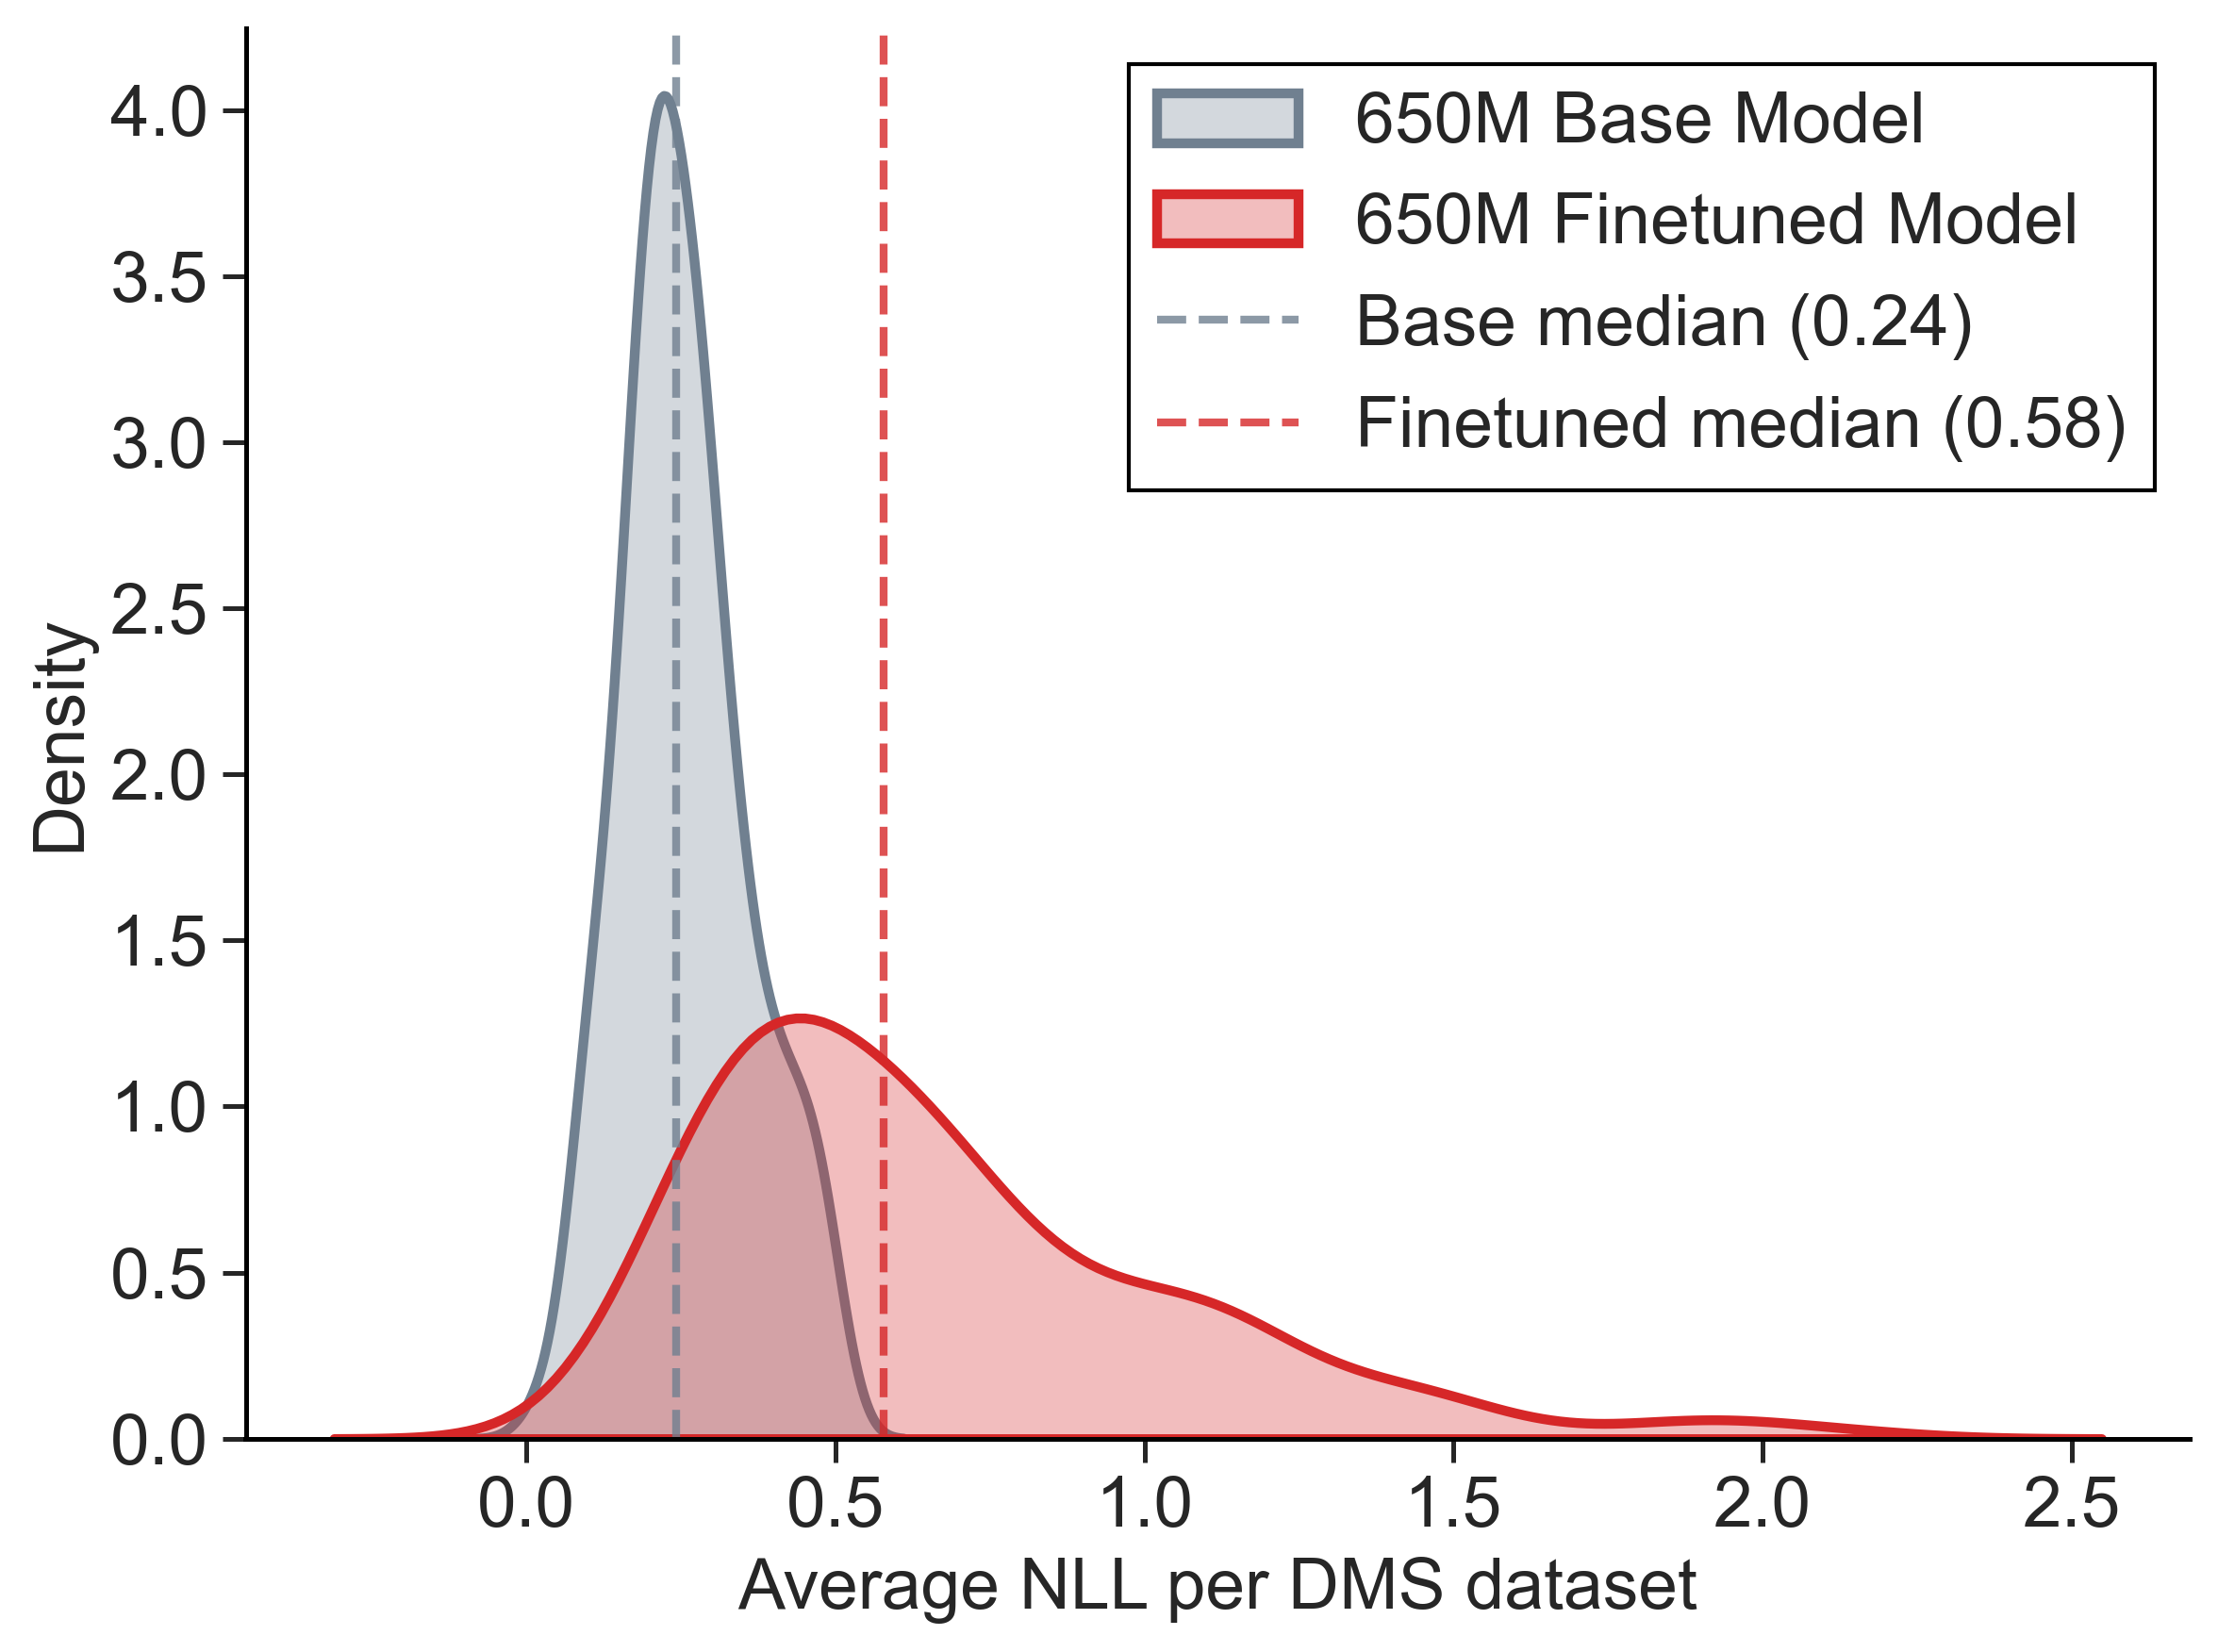

In [24]:
#@title Fig 6B

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Configuration
FIGURE_SIZE = (8, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
FONT_SIZE_LEGEND = 18
SPINE_WIDTH = 1.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

summary_df = pd.read_csv('../proteingym_allftscores.csv', header=0)

# Use the mean NLL columns directly
base_means = summary_df['NLL_650M_base']
ft_means   = summary_df['NLL_650M_ft']

# Create figure
fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)


# KDE plots with updated styling
sns.kdeplot(base_means, color='#708090', fill=True, alpha=0.3,
            linewidth=2.5, label='650M Base Model', ax=ax)
sns.kdeplot(ft_means, color='#d62728', fill=True, alpha=0.3,
            linewidth=2.5, label='650M Finetuned Model', ax=ax)

# Plot vertical lines for the median of each distribution
ax.axvline(base_means.median(), color='#708090', linestyle='--',
           linewidth=2, alpha=0.8, label=f'Base median ({base_means.median():.2f})')
ax.axvline(ft_means.median(), color='#d62728', linestyle='--',
           linewidth=2, alpha=0.8, label=f'Finetuned median ({ft_means.median():.2f})')

# Labels and formatting
ax.set_xlabel("Average NLL per DMS dataset", fontsize=FONT_SIZE_LABELS,
              fontweight='bold', fontproperties=arial_font)
ax.set_ylabel("Density", fontsize=FONT_SIZE_LABELS,
              fontweight='bold', fontproperties=arial_font)

# Tick formatting
ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS, width=SPINE_WIDTH, bottom=True, left=True)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(arial_font)
    label.set_fontsize(FONT_SIZE_TICKS)

# Create Arial font with the desired size
arial_font_legend = fm.FontProperties(fname="arial.ttf", size=FONT_SIZE_LEGEND)

# Legend
legend = ax.legend(fontsize=FONT_SIZE_LEGEND, frameon=True, fancybox=False,
                   edgecolor='black', framealpha=1, loc='best',
                   prop=arial_font_legend)  # Use the sized font

# # Legend
# legend = ax.legend(fontsize=FONT_SIZE_LEGEND, frameon=True, fancybox=False,
#                    edgecolor='black', framealpha=1, loc='best',
#                    prop=arial_font)

# Spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
    ax.spines[spine].set_color('black')

plt.tight_layout()
# plt.show()

# Optional: save the figure
plt.savefig('nll_distribution_comparison.svg', dpi=DPI, bbox_inches='tight')
# plt.savefig('nll_distribution_comparison.png', dpi=DPI, bbox_inches='tight')

Processed 195 datasets

=== Δ NLL Summary Statistics ===

Group: Variation Intolerant Regions
  N            = 195
  Mean         = 0.2036
  Median       = 0.0769
  Std          = 0.3000
  IQR          = [0.0270, 0.2371]
  Min / Max    = [-0.0312, 2.1920]

Group: Variation Tolerant Regions
  N            = 188
  Mean         = 0.4630
  Median       = 0.3737
  Std          = 0.3759
  IQR          = [0.1997, 0.6331]
  Min / Max    = [-0.2006, 2.0483]

=== Mann-Whitney U Test ===

Comparing: Variation Intolerant vs Variation Tolerant Regions
  U-statistic  = 8319.00
  p-value      = 2.4104e-20
  Significance: *** (p < 0.001)


/tmp/ipython-input-2210735874.py:197: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


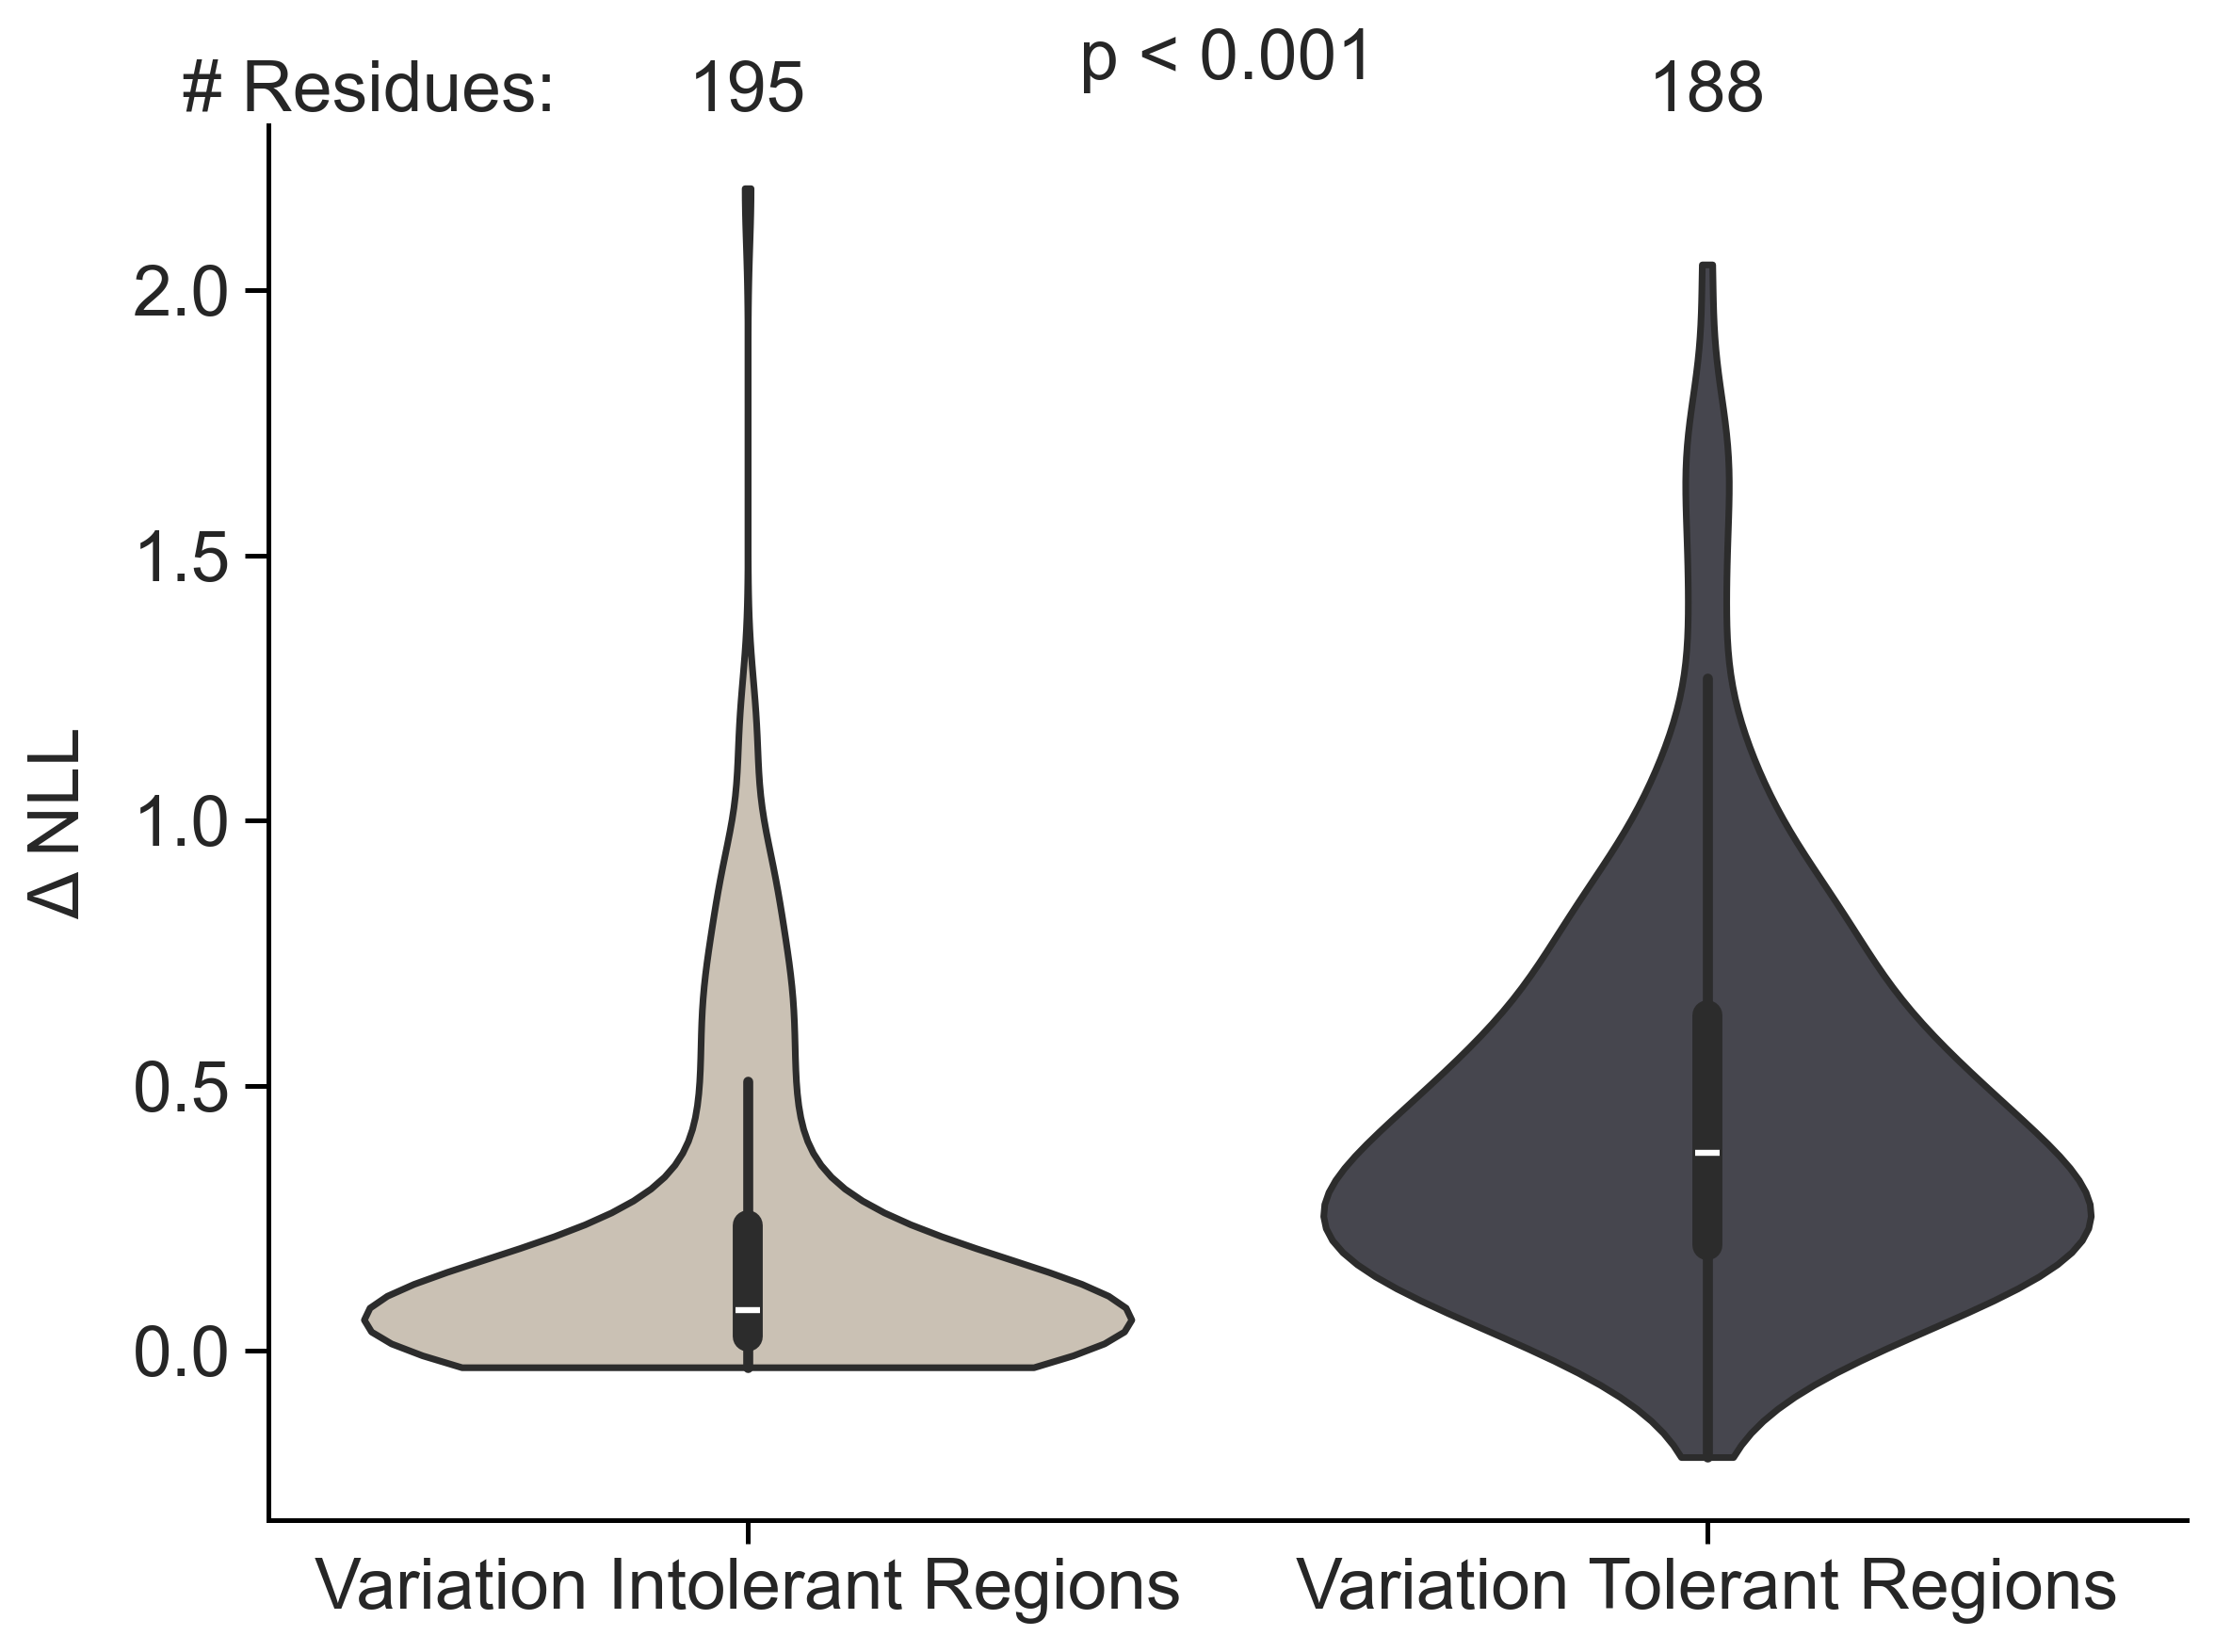

In [26]:
#@title Fig 6C
import pandas as pd
import numpy as np
import re
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.stats import wilcoxon, mannwhitneyu
import seaborn as sns
from pypalettes import load_cmap

# -----------------------------
# Style Configuration
# -----------------------------
FIGURE_SIZE = (8, 6)
DPI = 300
FONT_SIZE_LABELS = 18
FONT_SIZE_TICKS = 18
FONT_SIZE_TEXT = 18
SPINE_WIDTH = 1.2

# Load Arial font
arial_font = fm.FontProperties(fname="arial.ttf")

# -----------------------------
# Helpers
# -----------------------------

def extract_positions(mutant):
    """Extract residue positions from strings like T141N or T141N:A30N"""
    if pd.isna(mutant):
        return []
    return list(map(int, re.findall(r'[A-Z](\d+)[A-Z]', str(mutant))))


def get_positions_top_bottom(dms_df):
    """
    Return two sets of unique positions:
    - positions from top 10% of DMS_score (variation tolerant)
    - positions from bottom 10% of DMS_score (variation intolerant)
    Any position appearing in BOTH sets is removed from both.
    """
    top_cutoff = dms_df["DMS_score"].quantile(0.9)
    bot_cutoff = dms_df["DMS_score"].quantile(0.1)

    top_df = dms_df[dms_df["DMS_score"] >= top_cutoff]
    bot_df = dms_df[dms_df["DMS_score"] <= bot_cutoff]

    top_positions = set()
    bot_positions = set()

    for m in top_df["mutant"]:
        top_positions.update(extract_positions(m))

    for m in bot_df["mutant"]:
        bot_positions.update(extract_positions(m))

    # 🔑 remove ambiguous positions
    overlap = top_positions & bot_positions
    top_positions -= overlap
    bot_positions -= overlap

    return top_positions, bot_positions


# -----------------------------
# Main processing
# -----------------------------

def process_dms_files_violin(dms_dir, base_dir, ft_dir):
    records = []

    for dms_file in Path(dms_dir).glob("*.csv"):
        df_dms = pd.read_csv(dms_file)

        required_cols = {"DMS_score", "mutant"}
        if not required_cols.issubset(df_dms.columns):
            continue

        top_pos, bot_pos = get_positions_top_bottom(df_dms)
        if not top_pos and not bot_pos:
            continue

        llr_name = dms_file.stem + "_LLR.csv"
        base_path = Path(base_dir) / llr_name
        ft_path = Path(ft_dir) / llr_name
        if not base_path.exists() or not ft_path.exists():
            continue

        base = pd.read_csv(base_path)
        ft = pd.read_csv(ft_path)

        for label, positions in [
            ("Variation Tolerant Regions", top_pos),
            ("Variation Intolerant Regions", bot_pos),
        ]:
            if not positions:
                continue

            base_avg = base.loc[
                base.position.isin(positions), "nll"
            ].mean()
            ft_avg = ft.loc[
                ft.position.isin(positions), "nll"
            ].mean()

            records.append({
                "file": dms_file.name,
                "group": label,
                "delta_nll": ft_avg - base_avg,
                "n_positions": len(positions)
            })

    return pd.DataFrame(records)


def print_violin_summary_stats(df):
    print("\n=== Δ NLL Summary Statistics ===")

    for group in ["Variation Intolerant Regions", "Variation Tolerant Regions"]:
        vals = df[df["group"] == group]["delta_nll"].dropna()
        if vals.empty:
            continue

        q25, q75 = np.percentile(vals, [25, 75])

        print(f"\nGroup: {group}")
        print(f"  N            = {len(vals)}")
        print(f"  Mean         = {vals.mean():.4f}")
        print(f"  Median       = {vals.median():.4f}")
        print(f"  Std          = {vals.std():.4f}")
        print(f"  IQR          = [{q25:.4f}, {q75:.4f}]")
        print(f"  Min / Max    = [{vals.min():.4f}, {vals.max():.4f}]")


def print_mann_whitney_test(df):
    """Perform and print Mann-Whitney U test between the two groups"""
    print("\n=== Mann-Whitney U Test ===")

    data_intolerant = df[df["group"] == "Variation Intolerant Regions"]["delta_nll"].dropna()
    data_tolerant = df[df["group"] == "Variation Tolerant Regions"]["delta_nll"].dropna()

    if len(data_intolerant) > 0 and len(data_tolerant) > 0:
        statistic, pvalue = mannwhitneyu(data_intolerant, data_tolerant, alternative='two-sided')

        print(f"\nComparing: Variation Intolerant vs Variation Tolerant Regions")
        print(f"  U-statistic  = {statistic:.2f}")
        print(f"  p-value      = {pvalue:.4e}")

        if pvalue < 0.001:
            print(f"  Significance: *** (p < 0.001)")
        elif pvalue < 0.01:
            print(f"  Significance: ** (p < 0.01)")
        elif pvalue < 0.05:
            print(f"  Significance: * (p < 0.05)")
        else:
            print(f"  Significance: ns (p >= 0.05)")
    else:
        print("Insufficient data for Mann-Whitney U test")


# -----------------------------
# Plotting (Publication Style - matching Fig 2C)
# -----------------------------

def plot_violin(df, output="delta_nll_violin_variation_tolerance.svg"):
    df = df.dropna(subset=["delta_nll"])

    data_intolerant = df[df["group"] == "Variation Intolerant Regions"]["delta_nll"]
    data_tolerant = df[df["group"] == "Variation Tolerant Regions"]["delta_nll"]

    # Mann-Whitney U test
    stat_txt = ""
    if len(data_intolerant) > 0 and len(data_tolerant) > 0:
        statistic, pvalue = mannwhitneyu(data_intolerant, data_tolerant, alternative='two-sided')

        # Format p-value and significance
        if pvalue < 0.001:
            sig_marker = "***"
        elif pvalue < 0.01:
            sig_marker = "**"
        elif pvalue < 0.05:
            sig_marker = "*"
        else:
            sig_marker = "ns"

        stat_txt = f"Mann-Whitney U\np = {pvalue:.2e}\n{sig_marker}"

    # Create figure
    fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)

    # Define order and colors (using pypalettes like Fig 2C)
    class_order = ["Variation Intolerant Regions", "Variation Tolerant Regions"]
    palette = load_cmap("swift").colors[:2]

    # Create violin plot (matching Fig 2C style)
    sns.violinplot(
        x='group', y='delta_nll', data=df,
        order=class_order, palette=palette,
        cut=0, inner="box", linewidth=SPINE_WIDTH+0.5, ax=ax
    )

    # Add horizontal reference line at 0
    # ax.axhline(0, color='black', linestyle='--', linewidth=SPINE_WIDTH)

    # Labels with Arial font
    ax.set_xlabel('', fontsize=FONT_SIZE_LABELS,
                  fontweight='bold', fontproperties=arial_font, labelpad=10)
    ax.set_ylabel('Δ NLL', fontsize=FONT_SIZE_LABELS,
                  fontweight='bold', fontproperties=arial_font, labelpad=10)

    # Annotation - count number of datasets per group
    site_counts = df['group'].value_counts().reindex(class_order)
    ymax = df['delta_nll'].max()
    ymin = df['delta_nll'].min()
    yoffset = 0.05 * (ymax - ymin)

    ax.text(-0.2, ymax + yoffset, "# Residues:",
            ha='right', va='bottom', fontsize=FONT_SIZE_TEXT,
            fontweight='bold', fontproperties=arial_font)

    for i, cls in enumerate(class_order):
        if not pd.isna(site_counts[cls]):
            ax.text(i, ymax + yoffset, f"{int(site_counts[cls])}",
                    ha='center', va='bottom', fontsize=FONT_SIZE_TEXT,
                    fontweight='bold', fontproperties=arial_font)

    # Add p-value text between violins at the top
    if stat_txt:
        # Extract just the p-value from stat_txt
        if len(data_intolerant) > 0 and len(data_tolerant) > 0:
            statistic, pvalue = mannwhitneyu(data_intolerant, data_tolerant, alternative='two-sided')

            # Format p-value text
            if pvalue < 0.001:
                p_text = "p < 0.001"
            else:
                p_text = f"p = {pvalue:.3f}"

            # Position between the two violins at the top
            ax.text(0.5, ymax + yoffset * 1.5, p_text,
                    ha='center', va='bottom', fontsize=FONT_SIZE_TEXT,
                    fontweight='bold', fontproperties=arial_font)

    # Tick formatting (matching Fig 2C)
    ax.tick_params(axis='both', which='major', width=SPINE_WIDTH, color='black',
                   bottom=True, left=True)

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(arial_font)
        label.set_fontsize(FONT_SIZE_TICKS)

    # Spines (matching Fig 2C)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_linewidth(SPINE_WIDTH)
        ax.spines[spine].set_color('black')

    plt.tight_layout()
    plt.savefig(output, dpi=DPI, bbox_inches='tight')
    plt.show()


# -----------------------------
# Entry point
# -----------------------------

def main():
    DMS_DIR = "DMS"
    BASE_NLL_DIR = "../constraintometer/ESM_650M_NLL"
    FT_NLL_DIR = "../constraintometer/ESM_650M_test_NLL"

    df = process_dms_files_violin(DMS_DIR, BASE_NLL_DIR, FT_NLL_DIR)
    if df.empty:
        print("No valid datasets found.")
        return

    df.to_csv("delta_nll_variation_tolerance.csv", index=False)
    print(f"Processed {df['file'].nunique()} datasets")

    print_violin_summary_stats(df)

    # Perform Mann-Whitney U test
    print_mann_whitney_test(df)

    plot_violin(df)


if __name__ == "__main__":
    main()